In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.ensemble import VotingClassifier


In [3]:
# Load the datasets
train_df = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

In [4]:
# Check data types and missing values
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None


In [5]:
# Check dataset shape and first rows
print(f"Dataset contains {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
train_df.head()

Dataset contains 2190 rows and 13 columns.


id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [6]:
# Get statistical summary
train_df.describe()

id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39.000000     2.000000     0.000000   
25%      17.700000    16.800000    77.000000    69.000000     0.400000   
50%      23.850000    22.150000    82.000000    83.000000     2.400000   
75%      26.400000    25.000000    88.000000    88.000000     6.800000   
max      29.800000    26.700000    98.000000   100.000000    12.100000   

       winddirection    windspeed     rainfall  
count    2190.000000  2190.000000  2190.000000  
mean      104.863151    21.804703     0.753425  
std        80.002416     9.898659     0.431116  
min        10.000000     4.400000     0.000000  
25%        40.000000    14.125000     1.000000  
50%        70.000000    20.500000     1.000000  
75%       200.000000    27.900000     1.000000  
max       300.000000    59.500000     1.000000

In [7]:
# Save 'id' column for submission
test_ids = test_df['id']

# Define the target column
target_column = "rainfall"

# Select categorical and numerical columns (initial)
numerical_columns = [col for col in train_df.columns if col != "rainfall"]

# Print out column information
print("Target Column:", target_column)
print("\nNumerical Columns:", numerical_columns)

Target Column: rainfall

Numerical Columns: ['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


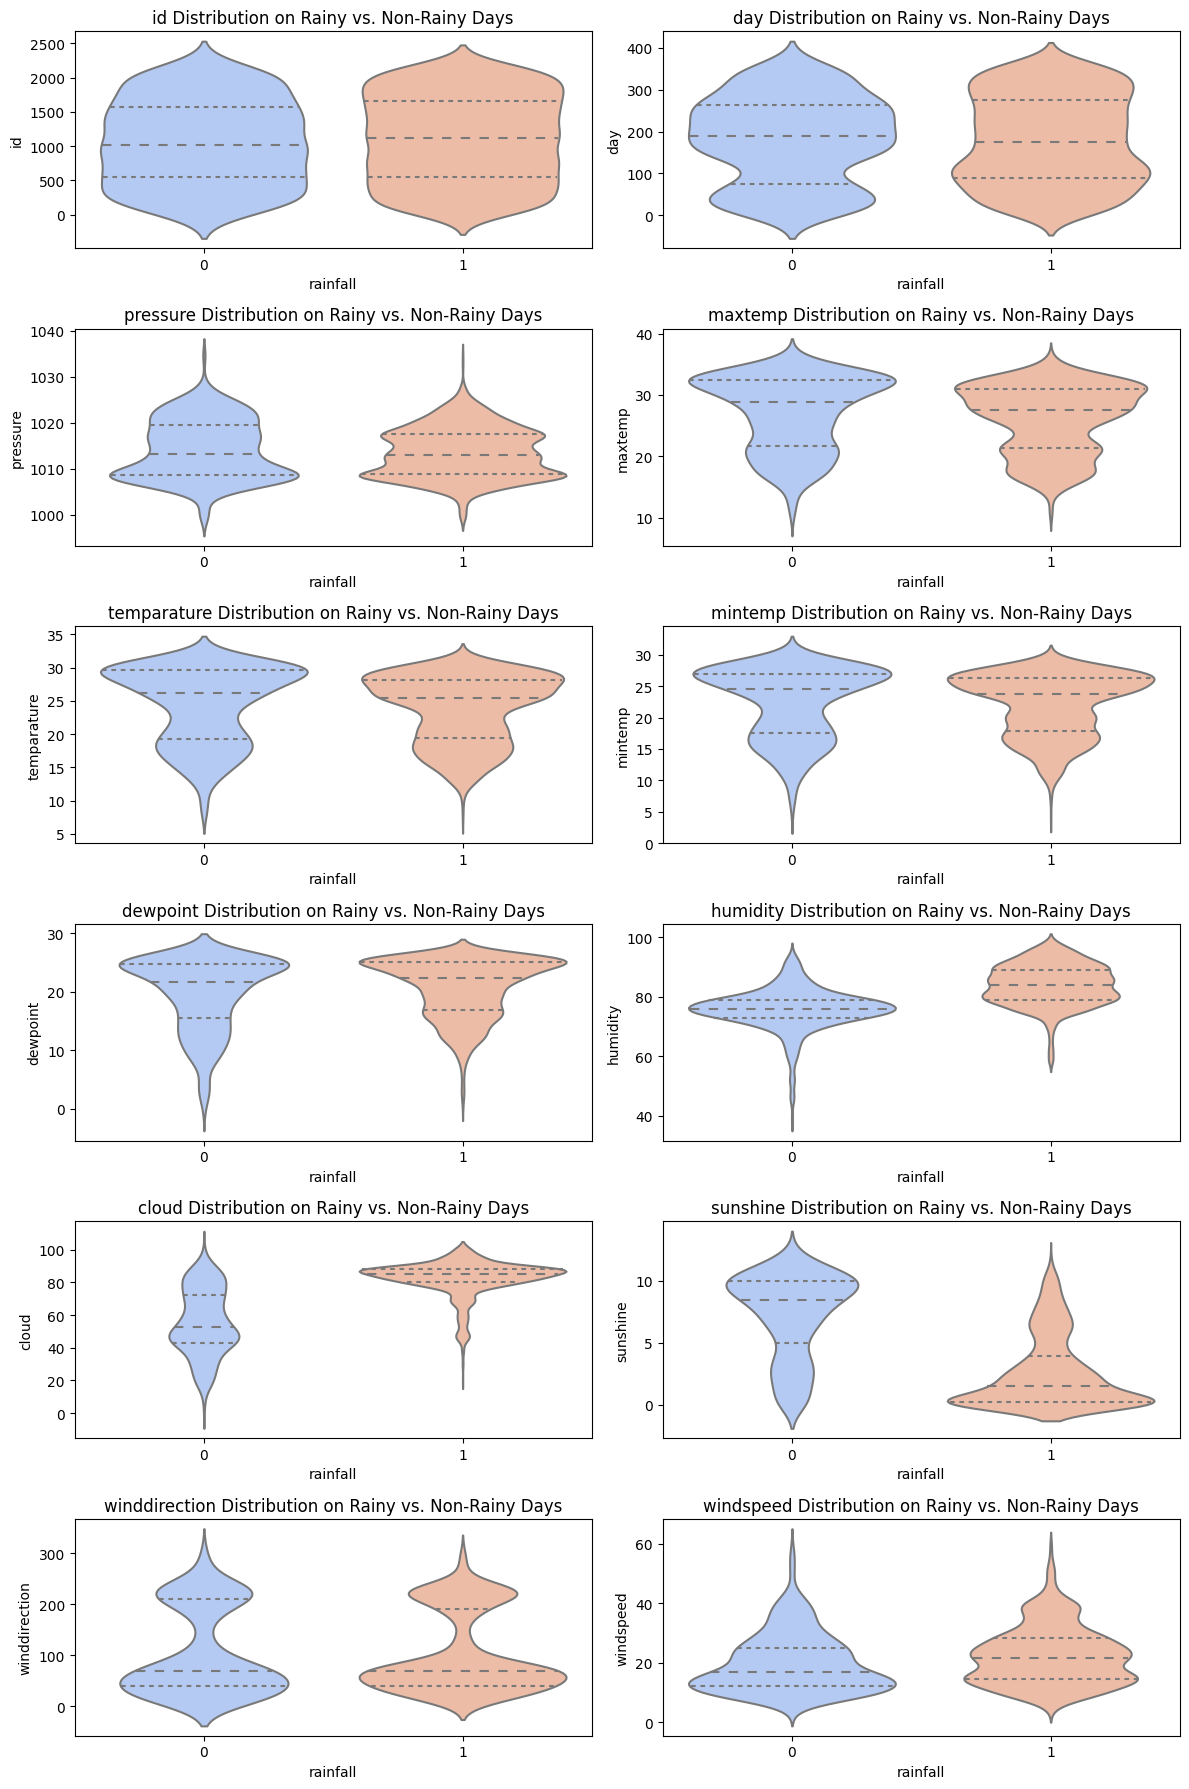

In [8]:
# Dynamically calculate number of rows & columns
num_vars = len(numerical_columns)
num_cols = 2  # Keep 2 columns for readability
num_rows = math.ceil(num_vars / num_cols)  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot violin plots
for i, var in enumerate(numerical_columns):
    sns.violinplot(x=train_df[target_column], y=train_df[var], palette="coolwarm", inner="quartile", ax=axes[i])
    axes[i].set_title(f"{var} Distribution on Rainy vs. Non-Rainy Days")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()

## 🌧️ Violin Plot Analysis: Rainy vs. Non-Rainy Days  

### **Key Observations**  

✅ **Pressure & Humidity**  
- Lower **pressure** and higher **humidity** strongly correlate with rainfall.  

✅ **Temperature & Dew Point**  
- **Temperature alone** is not a strong predictor, but **dew point** shows clearer separation.  

✅ **Sunshine & Cloud Cover**  
- **Sunshine drops significantly** on rainy days.  
- **Cloud cover** is one of the **strongest predictors** of rainfall.  

✅ **Wind Speed & Wind Direction**  
- **Higher wind variability** on rainy days, suggesting **storm-driven winds**.  
- **Bimodal wind direction**, indicating distinct weather regimes.  

✅ **Day (Time Effect)**  
- **Non-uniform distribution**, suggesting **seasonality** in rainfall patterns.  

✅ **ID (Index Feature)**  
- **No predictive power**, should be removed from modeling.  

### 🚀 **Next Steps**  
- Perform **time-series decomposition** to analyze **seasonal rainfall trends**.  

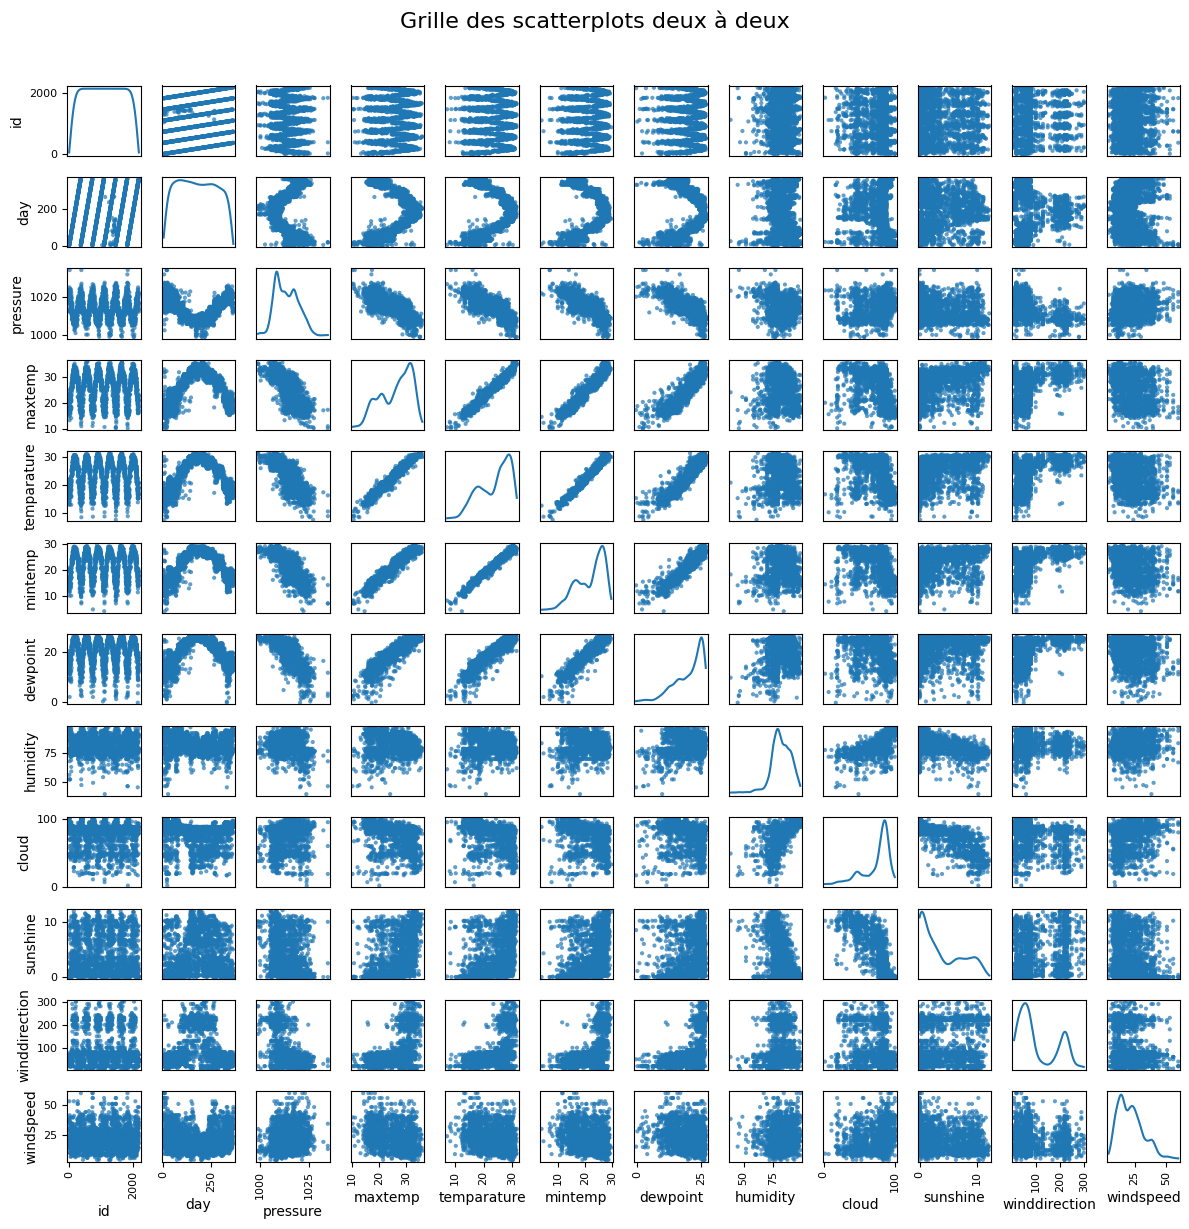

In [9]:
# Grille des scatterplots deux à deux pour visualiser les corrélations
pd.plotting.scatter_matrix(train_df[numerical_columns], figsize=(12, 12), diagonal='kde', alpha=0.7)

# Ajouter un titre général à la grille
plt.suptitle("Grille des scatterplots deux à deux", fontsize=16, y=1.02)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [10]:
def detect_outliers_iqr(df, column):
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)]

# Checking for outliers in each variable
outlier_counts = {var: len(detect_outliers_iqr(train_df, var)) for var in numerical_columns}
print(outlier_counts)

{'id': 0, 'day': 0, 'pressure': 4, 'maxtemp': 0, 'temparature': 0, 'mintemp': 1, 'dewpoint': 26, 'humidity': 28, 'cloud': 129, 'sunshine': 0, 'winddirection': 0, 'windspeed': 28}


In [11]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Estimate an automatic contamination level using percentiles
estimated_contamination = np.mean([
    len(detect_outliers_iqr(train_df, col)) / len(train_df) for col in numerical_columns
])

# Train Isolation Forest with dynamic contamination
iso_forest = IsolationForest(contamination=estimated_contamination, random_state=42)
train_df["anomaly"] = iso_forest.fit_predict(train_df[numerical_columns])

print(f"Estimated Contamination Rate: {estimated_contamination:.4f}")

Estimated Contamination Rate: 0.0082


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [12]:
# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
train_df["anomaly"] = iso_forest.fit_predict(train_df[numerical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [13]:
# Step 1: Detect IQR-based outliers across all numerical features
iqr_outliers = set()
for var in numerical_columns:
    iqr_outliers.update(detect_outliers_iqr(train_df, var).index)

# Step 2: Detect Isolation Forest anomalies
train_df["anomaly"] = iso_forest.fit_predict(train_df[numerical_columns])

# Step 3: Compare IQR outliers and Isolation Forest anomalies
iso_outliers = set(train_df[train_df["anomaly"] == -1].index)

# Step 4: Find common and unique outliers
common_outliers = iqr_outliers.intersection(iso_outliers)
only_iqr_outliers = iqr_outliers - iso_outliers
only_iso_outliers = iso_outliers - iqr_outliers

# Step 5: Print results
print(f"Total IQR Outliers: {len(iqr_outliers)}")
print(f"Total Isolation Forest Outliers: {len(iso_outliers)}")
print(f"Common Outliers: {len(common_outliers)}")
print(f"Outliers detected **only** by IQR: {len(only_iqr_outliers)}")
print(f"Outliers detected **only** by Isolation Forest: {len(only_iso_outliers)}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Total IQR Outliers: 194
Total Isolation Forest Outliers: 110
Common Outliers: 72
Outliers detected **only** by IQR: 122
Outliers detected **only** by Isolation Forest: 38


✅ Most IQR outliers may just be extreme values in one variable (not necessarily "weird" when considering multiple variables).

✅ Isolation Forest is likely detecting more "real-world" anomalies that result from unusual feature interactions (e.g., temperature & humidity behaving unexpectedly together).

✅ 72 common outliers confirm that some extreme values are also multivariate anomalies, reinforcing their likelihood as true anomalies.

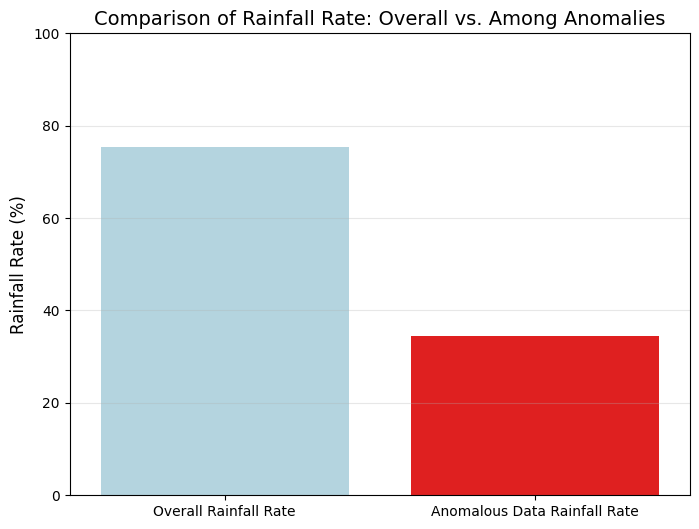

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute overall rainfall rate
global_rainfall_rate = train_df["rainfall"].mean() * 100  # Convert to percentage

# Compute rainfall rate among anomalies
anomaly_rainfall_rate = train_df[train_df["anomaly"] == -1]["rainfall"].mean() * 100  # Convert to percentage

# Create a DataFrame for visualization
rainfall_comparison = pd.DataFrame({
    "Category": ["Overall Rainfall Rate", "Anomalous Data Rainfall Rate"],
    "Rainfall Rate (%)": [global_rainfall_rate, anomaly_rainfall_rate]
})

# Plot the comparison
plt.figure(figsize=(8, 6))
sns.barplot(data=rainfall_comparison, x="Category", y="Rainfall Rate (%)", palette=["lightblue", "red"])


# Formatting
plt.title("Comparison of Rainfall Rate: Overall vs. Among Anomalies", fontsize=14)
plt.ylabel("Rainfall Rate (%)", fontsize=12)
plt.xlabel("")
plt.ylim(0, 100)  # Ensure the scale is percentage-based
plt.grid(axis="y", alpha=0.3)

# Show plot
plt.show()


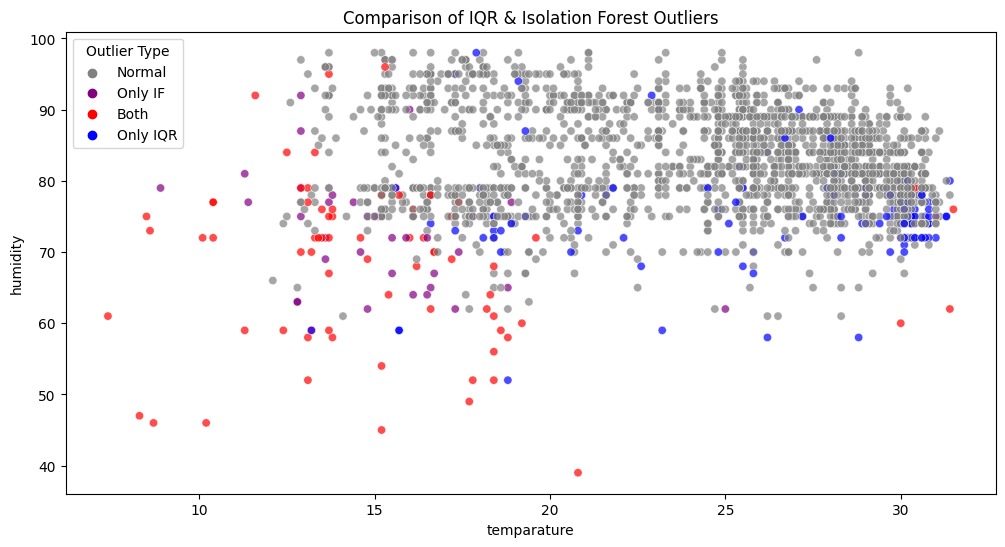

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=train_df["temparature"], y=train_df["humidity"], 
    hue=train_df.index.map(lambda idx: 
        "Both" if idx in common_outliers else 
        "Only IQR" if idx in only_iqr_outliers else 
        "Only IF" if idx in only_iso_outliers else "Normal"),
    palette={"Both": "red", "Only IQR": "blue", "Only IF": "purple", "Normal": "gray"},
    alpha=0.7
)
plt.title("Comparison of IQR & Isolation Forest Outliers")
plt.legend(title="Outlier Type")
plt.show()

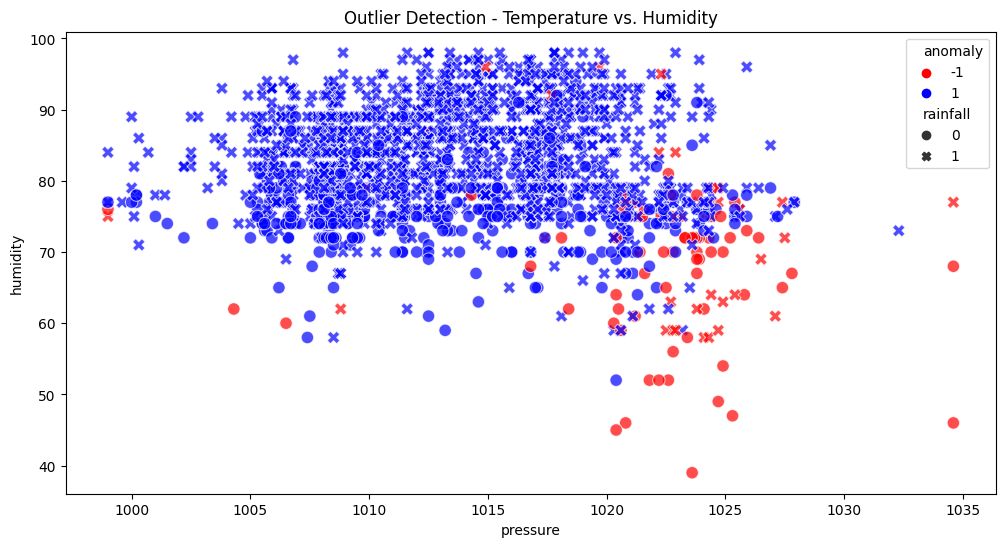

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=train_df["pressure"], 
    y=train_df["humidity"], 
    hue=train_df["anomaly"], 
    style=train_df["rainfall"], 
    palette={1: "blue", -1: "red"}, 
    s=80, 
    alpha=0.7
)
plt.title("Outlier Detection - Temperature vs. Humidity")
plt.show()

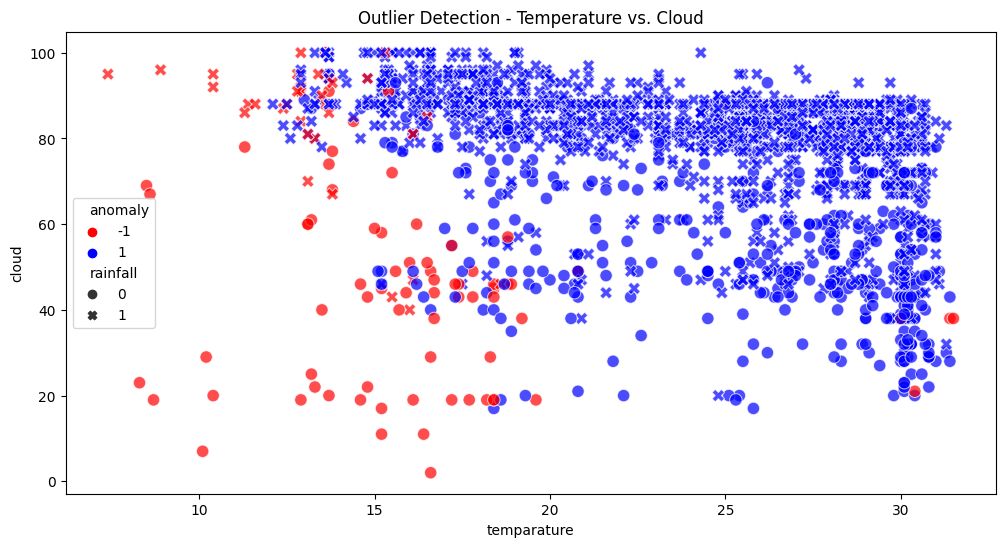

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=train_df["temparature"], 
    y=train_df["cloud"], 
    hue=train_df["anomaly"], 
    style=train_df["rainfall"], 
    palette={1: "blue", -1: "red"}, 
    s=80, 
    alpha=0.7
)
plt.title("Outlier Detection - Temperature vs. Cloud")
plt.show()

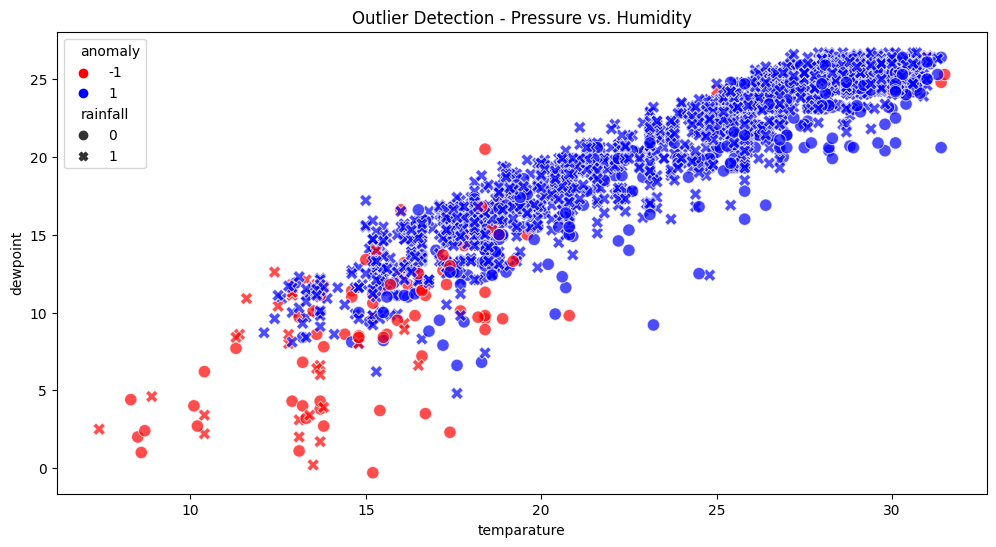

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=train_df["temparature"], 
    y=train_df["dewpoint"], 
    hue=train_df["anomaly"], 
    style=train_df["rainfall"], 
    palette={1: "blue", -1: "red"}, 
    s=80, 
    alpha=0.7
)
plt.title("Outlier Detection - Pressure vs. Humidity")
plt.show()

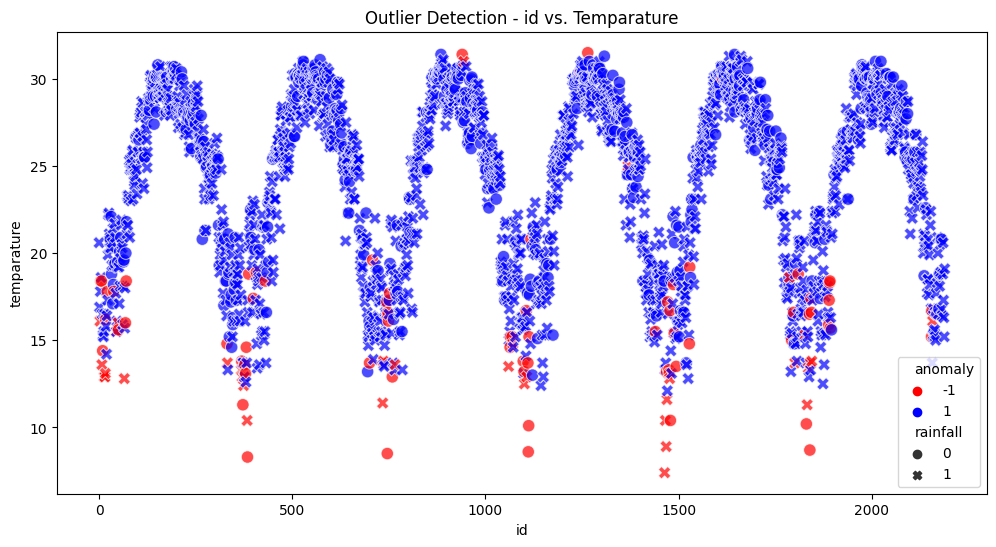

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=train_df["id"], 
    y=train_df["temparature"], 
    hue=train_df["anomaly"], 
    style=train_df["rainfall"], 
    palette={1: "blue", -1: "red"}, 
    s=80, 
    alpha=0.7
)
plt.title("Outlier Detection - id vs. Temparature")
plt.show()

✅ Outliers are clustered together, it suggests a systematic pattern rather than random anomalies. This could indicate:

- A specific weather phenomenon (e.g., a seasonal storm pattern or an unusual heatwave).
- Sensor errors or bias (e.g., faulty temperature readings always appearing in the same range).
- A distinct data distribution (e.g., a particular climate period that is rare but not necessarily anomalous).

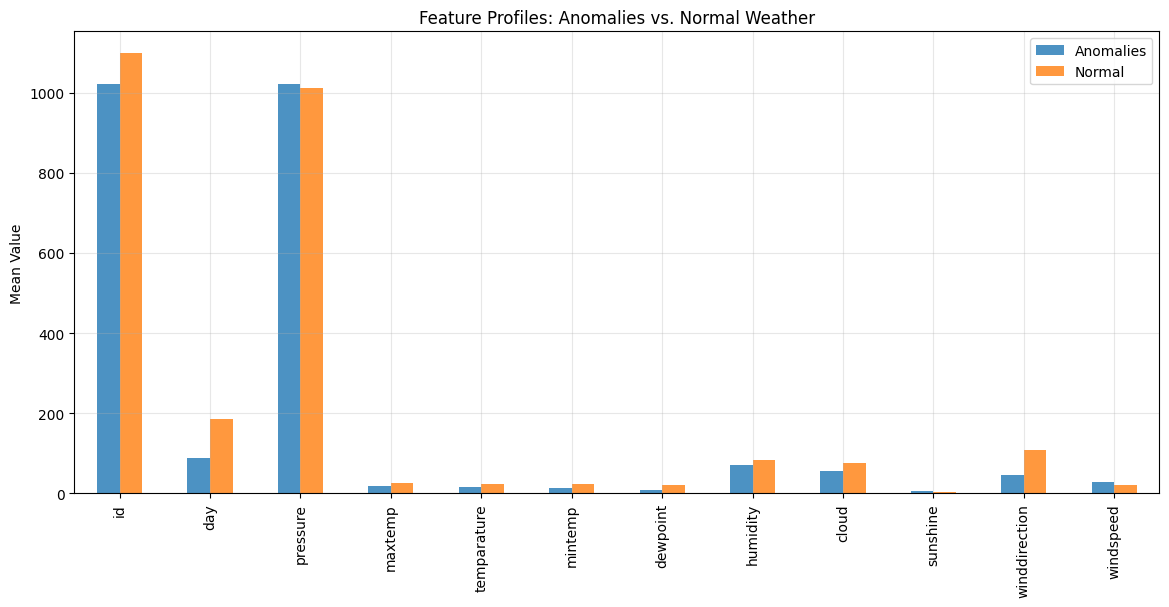

In [20]:
# Mean weather conditions among anomalies
anomaly_profile = train_df[train_df["anomaly"] == -1][numerical_columns].mean()
normal_profile = train_df[train_df["anomaly"] == 1][numerical_columns].mean()

comparison = pd.DataFrame({
    "Anomalies": anomaly_profile,
    "Normal": normal_profile
})

comparison.plot(kind="bar", figsize=(14, 6), alpha=0.8)
plt.title("Feature Profiles: Anomalies vs. Normal Weather")
plt.ylabel("Mean Value")
plt.grid(alpha=0.3)
plt.show()


In [21]:
from scipy.stats import ks_2samp

# Sélection des deux groupes à comparer
rainy_days = train_df[train_df["rainfall"] == 1]
suspicious_dry_days = train_df[(train_df["anomaly"] == -1) & (train_df["rainfall"] == 0)]

# Appliquer le KS-test à chaque variable
ks_results = {}
for var in numerical_columns:
    stat, p_value = ks_2samp(rainy_days[var], suspicious_dry_days[var])
    ks_results[var] = {"KS_stat": stat, "p_value": p_value}

# Résultats triés par similarité (p-value décroissante)
import pandas as pd
ks_df = pd.DataFrame(ks_results).T.sort_values("p_value", ascending=False)
print(ks_df)


                KS_stat       p_value
id             0.114040  3.065216e-01
windspeed      0.189192  1.229110e-02
winddirection  0.485808  1.740644e-15
day            0.586263  5.436231e-23
maxtemp        0.592929  1.470544e-23
sunshine       0.658586  1.038485e-29
temparature    0.676667  1.386389e-31
mintemp        0.684495  2.012146e-32
dewpoint       0.737374  1.214201e-38
humidity       0.747475  6.306239e-40
pressure       0.755000  6.408901e-41
cloud          0.777980  4.238191e-44


## 🔬 Statistical Comparison: Rainy Days vs. Dry Anomalies

We performed a two-sample **Kolmogorov-Smirnov test** to compare each weather variable between:
- 🌧️ **Rainy days** (`rainfall = 1`)
- 🔴 **Anomalies without rain** (`anomaly = -1` & `rainfall = 0`)

### ✅ Key Insights

- **Only `id` showed no significant difference** (p = 0.31), which is expected since it's not meteorological.
- All **weather-related features** (e.g., temperature, pressure, humidity, dew point) showed **very significant differences** (p ≪ 0.05).
- The most different variables were:
  - `cloud`, `pressure`, `humidity`, `dewpoint`, `mintemp`, `temperature`, `sunshine`
- These results suggest that **dry anomalies do not statistically resemble rainy days** across most meteorological dimensions.

### ⚠️ Conclusion

Although the **intuition was good**, the statistical evidence shows that the **dry anomalies behave very differently** from typical rainy days. They are **not "missed rain events"**, but rather **outliers due to other rare conditions**.

> Want to explore what makes them unique instead? A clustering approach (e.g., DBSCAN or t-SNE) could help.


In [22]:
# Drop 'id' before processing
numerical_columns = [col for col in numerical_columns if col != "id"]

# Select only anomalies
anomalies_df = train_df[train_df["anomaly"] == -1][numerical_columns]

# Normalize features
scaler = StandardScaler()
anomalies_scaled = scaler.fit_transform(anomalies_df)

print(f"Remaining features: {numerical_columns}")

Remaining features: ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


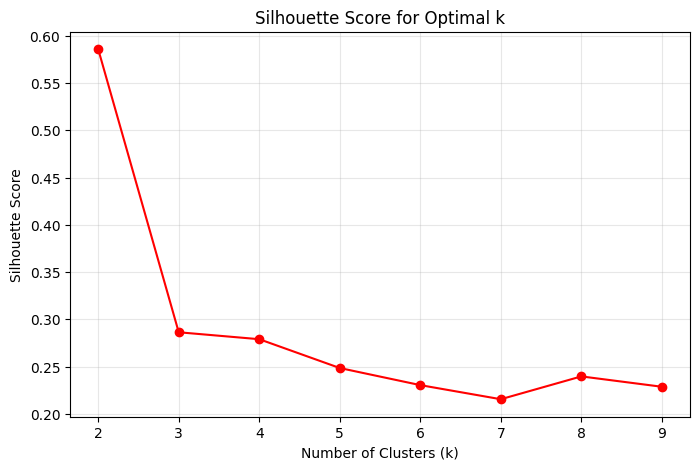

In [23]:

sil_scores = []
k_range = range(2, 10)  # Start from 2 because silhouette score needs at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(anomalies_scaled)
    score = silhouette_score(anomalies_scaled, labels)
    sil_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker="o", linestyle="-", color="r")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.xticks(k_range)
plt.grid(alpha=0.3)
plt.show()


In [24]:

# Train K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
anomalies_df["kmeans_cluster"] = kmeans.fit_predict(anomalies_scaled)  # ✅ Correct

# Now proceed with analysis
print(anomalies_df["kmeans_cluster"].value_counts())  # Check cluster sizes


kmeans_cluster
0    64
1    40
2     6
Name: count, dtype: int64


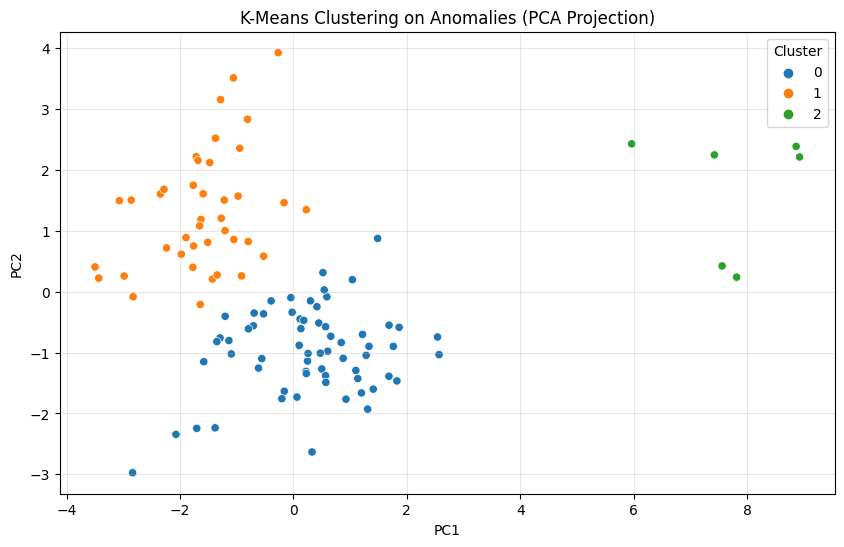

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
anomalies_2d = pca.fit_transform(anomalies_scaled)

# Add PCA results to dataframe
anomalies_df["PC1"] = anomalies_2d[:, 0]
anomalies_df["PC2"] = anomalies_2d[:, 1]

# Plot K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anomalies_df, x="PC1", y="PC2", hue="kmeans_cluster", palette="tab10")
plt.title("K-Means Clustering on Anomalies (PCA Projection)")
plt.legend(title="Cluster")
plt.grid(alpha=0.3)
plt.show()


📌 What This Means :

1️⃣ Anomalies are not all the same → There are at least two types of abnormal weather conditions detected by DBSCAN.

2️⃣ Some anomalies (Cluster 1) are very different from the rest, suggesting a unique weather event.

3️⃣ A few extreme points remain isolated (-1), meaning they are true one-off events.

In [26]:
cluster_profiles = anomalies_df.groupby("kmeans_cluster")[numerical_columns].mean()
print(cluster_profiles)


                     day     pressure    maxtemp  temparature    mintemp  \
kmeans_cluster                                                             
0                92.5625  1022.987500  18.518750    15.729688  13.595313   
1                62.3000  1023.155000  14.882500    12.855000  10.845000   
2               196.5000  1004.566667  33.483333    29.883333  27.316667   

                 dewpoint   humidity      cloud  sunshine  winddirection  \
kmeans_cluster                                                             
0                9.707812  66.640625  38.656250  8.689063      34.687500   
1                7.312500  75.050000  86.950000  0.872500      35.000000   
2               25.216667  69.000000  46.666667  9.783333     223.333333   

                windspeed  
kmeans_cluster             
0               24.217188  
1               33.337500  
2               27.166667  


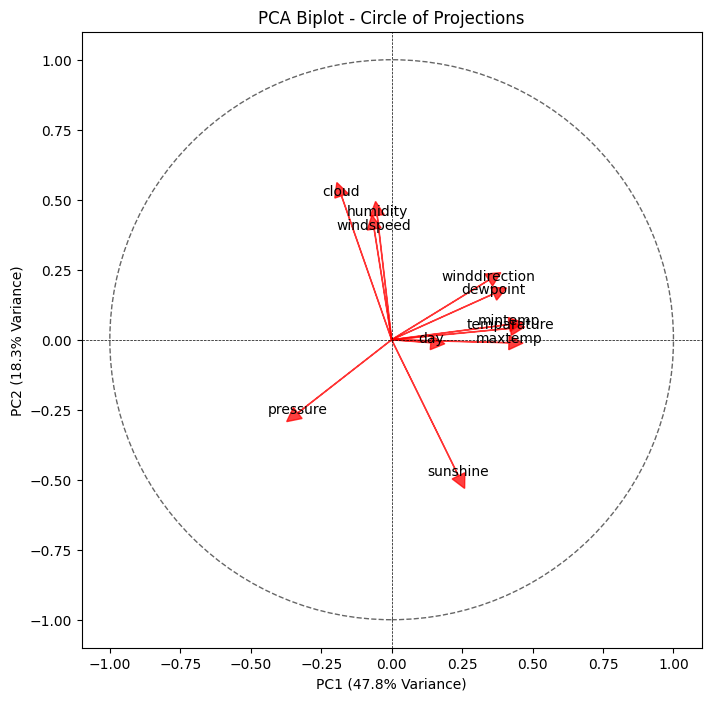

In [27]:
# Standardize the anomaly dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(anomalies_df[numerical_columns])  # Use your numerical columns

# Perform PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the circle of projections
fig, ax = plt.subplots(figsize=(8, 8))

# Draw unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle="dashed", alpha=0.6)
ax.add_artist(circle)

# Plot arrows for each feature
for i, feature in enumerate(numerical_columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, head_length=0.05, color='r', alpha=0.75)
    plt.text(pca.components_[0, i], pca.components_[1, i], feature, color='black', ha='center', fontsize=10)

# Labels and formatting
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linewidth=0.5, linestyle="dashed")
plt.axvline(0, color='black', linewidth=0.5, linestyle="dashed")
plt.title("PCA Biplot - Circle of Projections")
plt.xlabel(f"PC1 ({explained_variance[0]*100:.1f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.1f}% Variance)")

plt.show()


<Figure size 1400x800 with 0 Axes>

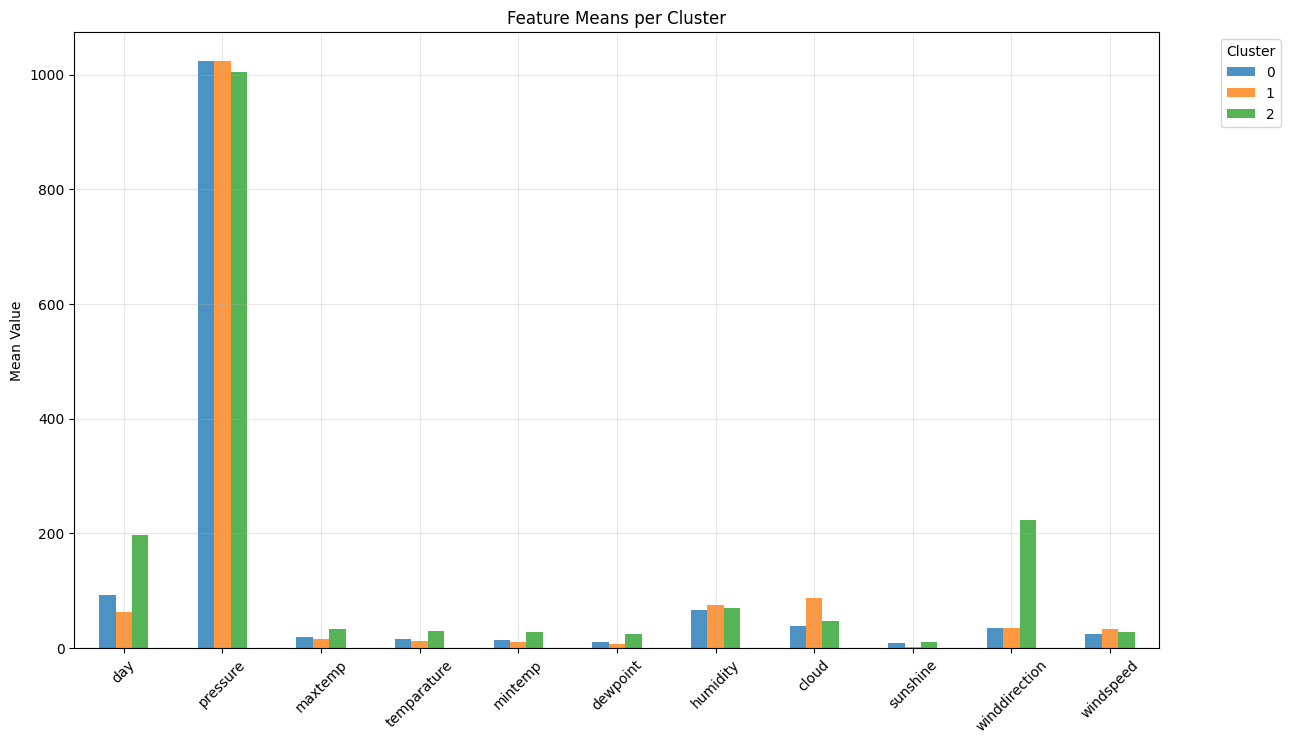

In [28]:
import matplotlib.pyplot as plt

# Compute cluster profiles
cluster_profiles = anomalies_df.groupby("kmeans_cluster")[numerical_columns].mean()

# Transpose for plotting
cluster_profiles_transposed = cluster_profiles.T

# Plot
plt.figure(figsize=(14, 8))
cluster_profiles_transposed.plot(kind="bar", figsize=(14, 8), alpha=0.8)
plt.title("Feature Means per Cluster")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [29]:
# Prepare training data
X = train_df[numerical_columns]
y = train_df["rainfall"]  # Target: Rain or No Rain

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.84


In [30]:
# Add anomaly labels as a new feature
train_df["anomaly"] = iso_forest.fit_predict(train_df[numerical_columns])

# Prepare training data with anomaly feature
X = train_df[numerical_columns + ["anomaly"]]  # Include anomaly as a feature
y = train_df["rainfall"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy (with anomalies): {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Model Accuracy (with anomalies): 0.85


In [31]:
# Remove anomalies from training
clean_train_df = train_df[train_df["anomaly"] == 1]

# Prepare training data
X_clean = clean_train_df[numerical_columns]
y_clean = clean_train_df["rainfall"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy (without anomalies): {accuracy:.3f}")

Model Accuracy (without anomalies): 0.865


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.005 | Accuracy on fixed test set: 0.863 | Samples used: 1743


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.010 | Accuracy on fixed test set: 0.865 | Samples used: 1734


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.015 | Accuracy on fixed test set: 0.863 | Samples used: 1725


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.020 | Accuracy on fixed test set: 0.865 | Samples used: 1716


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.025 | Accuracy on fixed test set: 0.863 | Samples used: 1708


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.030 | Accuracy on fixed test set: 0.863 | Samples used: 1699


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.035 | Accuracy on fixed test set: 0.861 | Samples used: 1690


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.040 | Accuracy on fixed test set: 0.861 | Samples used: 1681


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.045 | Accuracy on fixed test set: 0.861 | Samples used: 1673


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.050 | Accuracy on fixed test set: 0.861 | Samples used: 1664


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.055 | Accuracy on fixed test set: 0.858 | Samples used: 1655


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.060 | Accuracy on fixed test set: 0.858 | Samples used: 1646


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.065 | Accuracy on fixed test set: 0.856 | Samples used: 1638


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.070 | Accuracy on fixed test set: 0.856 | Samples used: 1629


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.075 | Accuracy on fixed test set: 0.854 | Samples used: 1620


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.080 | Accuracy on fixed test set: 0.852 | Samples used: 1611


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.085 | Accuracy on fixed test set: 0.854 | Samples used: 1603


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.090 | Accuracy on fixed test set: 0.849 | Samples used: 1594


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.095 | Accuracy on fixed test set: 0.849 | Samples used: 1585


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.100 | Accuracy on fixed test set: 0.847 | Samples used: 1576


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.105 | Accuracy on fixed test set: 0.852 | Samples used: 1568


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.110 | Accuracy on fixed test set: 0.854 | Samples used: 1559


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.115 | Accuracy on fixed test set: 0.849 | Samples used: 1550


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.120 | Accuracy on fixed test set: 0.854 | Samples used: 1541


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.125 | Accuracy on fixed test set: 0.854 | Samples used: 1533


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.130 | Accuracy on fixed test set: 0.849 | Samples used: 1524


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.135 | Accuracy on fixed test set: 0.847 | Samples used: 1515


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.140 | Accuracy on fixed test set: 0.849 | Samples used: 1506


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.145 | Accuracy on fixed test set: 0.849 | Samples used: 1498


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.150 | Accuracy on fixed test set: 0.847 | Samples used: 1489


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.155 | Accuracy on fixed test set: 0.849 | Samples used: 1480


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.160 | Accuracy on fixed test set: 0.849 | Samples used: 1471


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.165 | Accuracy on fixed test set: 0.849 | Samples used: 1463


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.170 | Accuracy on fixed test set: 0.849 | Samples used: 1454


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.175 | Accuracy on fixed test set: 0.847 | Samples used: 1445


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.180 | Accuracy on fixed test set: 0.849 | Samples used: 1436


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.185 | Accuracy on fixed test set: 0.849 | Samples used: 1428


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.190 | Accuracy on fixed test set: 0.849 | Samples used: 1419


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.195 | Accuracy on fixed test set: 0.849 | Samples used: 1410


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.200 | Accuracy on fixed test set: 0.845 | Samples used: 1401


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.205 | Accuracy on fixed test set: 0.840 | Samples used: 1393


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.210 | Accuracy on fixed test set: 0.842 | Samples used: 1384


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.215 | Accuracy on fixed test set: 0.840 | Samples used: 1375


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.220 | Accuracy on fixed test set: 0.840 | Samples used: 1366


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.225 | Accuracy on fixed test set: 0.842 | Samples used: 1358


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.230 | Accuracy on fixed test set: 0.840 | Samples used: 1349


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.235 | Accuracy on fixed test set: 0.842 | Samples used: 1340


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.240 | Accuracy on fixed test set: 0.842 | Samples used: 1331


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.245 | Accuracy on fixed test set: 0.842 | Samples used: 1323


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.250 | Accuracy on fixed test set: 0.842 | Samples used: 1314


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.255 | Accuracy on fixed test set: 0.840 | Samples used: 1305


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.260 | Accuracy on fixed test set: 0.842 | Samples used: 1296


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.265 | Accuracy on fixed test set: 0.838 | Samples used: 1287


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.270 | Accuracy on fixed test set: 0.842 | Samples used: 1279


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.275 | Accuracy on fixed test set: 0.840 | Samples used: 1270


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.280 | Accuracy on fixed test set: 0.836 | Samples used: 1261


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.285 | Accuracy on fixed test set: 0.836 | Samples used: 1252


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.290 | Accuracy on fixed test set: 0.838 | Samples used: 1244


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.295 | Accuracy on fixed test set: 0.845 | Samples used: 1235


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.300 | Accuracy on fixed test set: 0.845 | Samples used: 1226


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.305 | Accuracy on fixed test set: 0.847 | Samples used: 1217


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.310 | Accuracy on fixed test set: 0.849 | Samples used: 1209


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.315 | Accuracy on fixed test set: 0.842 | Samples used: 1200


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.320 | Accuracy on fixed test set: 0.840 | Samples used: 1191


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.325 | Accuracy on fixed test set: 0.840 | Samples used: 1182


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.330 | Accuracy on fixed test set: 0.840 | Samples used: 1174


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.335 | Accuracy on fixed test set: 0.840 | Samples used: 1165


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.340 | Accuracy on fixed test set: 0.838 | Samples used: 1156


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.345 | Accuracy on fixed test set: 0.838 | Samples used: 1147


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.350 | Accuracy on fixed test set: 0.838 | Samples used: 1139


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.355 | Accuracy on fixed test set: 0.836 | Samples used: 1130


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.360 | Accuracy on fixed test set: 0.838 | Samples used: 1121


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.365 | Accuracy on fixed test set: 0.836 | Samples used: 1112


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.370 | Accuracy on fixed test set: 0.838 | Samples used: 1104


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.375 | Accuracy on fixed test set: 0.836 | Samples used: 1095


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.380 | Accuracy on fixed test set: 0.836 | Samples used: 1086


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.385 | Accuracy on fixed test set: 0.831 | Samples used: 1077


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.390 | Accuracy on fixed test set: 0.836 | Samples used: 1069


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.395 | Accuracy on fixed test set: 0.829 | Samples used: 1060


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.400 | Accuracy on fixed test set: 0.826 | Samples used: 1051


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.405 | Accuracy on fixed test set: 0.826 | Samples used: 1042


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.410 | Accuracy on fixed test set: 0.826 | Samples used: 1034


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.415 | Accuracy on fixed test set: 0.829 | Samples used: 1025


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.420 | Accuracy on fixed test set: 0.829 | Samples used: 1016


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.425 | Accuracy on fixed test set: 0.829 | Samples used: 1007


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.430 | Accuracy on fixed test set: 0.829 | Samples used: 999


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.435 | Accuracy on fixed test set: 0.829 | Samples used: 990


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.440 | Accuracy on fixed test set: 0.829 | Samples used: 981


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.445 | Accuracy on fixed test set: 0.829 | Samples used: 972


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.450 | Accuracy on fixed test set: 0.831 | Samples used: 964


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.455 | Accuracy on fixed test set: 0.826 | Samples used: 955


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.460 | Accuracy on fixed test set: 0.826 | Samples used: 946


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.465 | Accuracy on fixed test set: 0.824 | Samples used: 937


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.470 | Accuracy on fixed test set: 0.824 | Samples used: 929


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.475 | Accuracy on fixed test set: 0.824 | Samples used: 920


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.480 | Accuracy on fixed test set: 0.824 | Samples used: 911


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.485 | Accuracy on fixed test set: 0.822 | Samples used: 902


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.490 | Accuracy on fixed test set: 0.826 | Samples used: 894


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.495 | Accuracy on fixed test set: 0.822 | Samples used: 885


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.500 | Accuracy on fixed test set: 0.820 | Samples used: 876


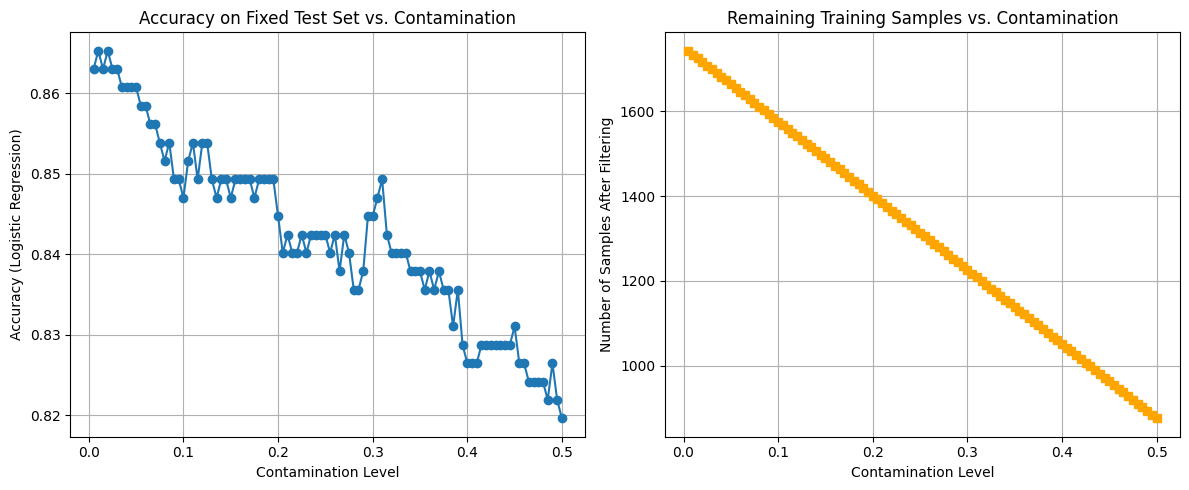

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fix the test set (20% stratified)
X = train_df[numerical_columns]
y = train_df["rainfall"]

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize test set once
scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)

# Contamination values from 0.005 to 0.5 with step 0.005
contamination_values = np.arange(0.005, 0.501, 0.005)
accuracies = []
remaining_samples = []

for contamination in contamination_values:
    # Isolation Forest on training data only
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    y_pred_outliers = iso_forest.fit_predict(X_train_full)

    # Filter inliers only
    mask_inliers = y_pred_outliers == 1
    X_train_clean = X_train_full[mask_inliers]
    y_train_clean = y_train_full[mask_inliers]
    remaining_samples.append(len(X_train_clean))

    # Standardize training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_clean)

    # Train logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train_clean)

    # Evaluate on fixed test set
    accuracy = model.score(X_test_scaled, y_test)
    accuracies.append(accuracy)

    print(f"Contamination: {contamination:.3f} | Accuracy on fixed test set: {accuracy:.3f} | Samples used: {len(X_train_clean)}")

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(contamination_values, accuracies, marker='o')
plt.title("Accuracy on Fixed Test Set vs. Contamination")
plt.xlabel("Contamination Level")
plt.ylabel("Accuracy (Logistic Regression)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(contamination_values, remaining_samples, marker='s', color='orange')
plt.title("Remaining Training Samples vs. Contamination")
plt.xlabel("Contamination Level")
plt.ylabel("Number of Samples After Filtering")
plt.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.005 | Accuracy on fixed test set: 0.863 | Samples used: 1743


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.010 | Accuracy on fixed test set: 0.865 | Samples used: 1734


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.015 | Accuracy on fixed test set: 0.863 | Samples used: 1725


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.020 | Accuracy on fixed test set: 0.865 | Samples used: 1716


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.025 | Accuracy on fixed test set: 0.863 | Samples used: 1708


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.030 | Accuracy on fixed test set: 0.863 | Samples used: 1699


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.035 | Accuracy on fixed test set: 0.861 | Samples used: 1690


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.040 | Accuracy on fixed test set: 0.861 | Samples used: 1681


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.045 | Accuracy on fixed test set: 0.861 | Samples used: 1673


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.050 | Accuracy on fixed test set: 0.861 | Samples used: 1664


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.055 | Accuracy on fixed test set: 0.858 | Samples used: 1655


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.060 | Accuracy on fixed test set: 0.858 | Samples used: 1646


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.065 | Accuracy on fixed test set: 0.856 | Samples used: 1638


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.070 | Accuracy on fixed test set: 0.856 | Samples used: 1629


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.075 | Accuracy on fixed test set: 0.854 | Samples used: 1620


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.080 | Accuracy on fixed test set: 0.852 | Samples used: 1611


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.085 | Accuracy on fixed test set: 0.854 | Samples used: 1603


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.090 | Accuracy on fixed test set: 0.849 | Samples used: 1594


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.095 | Accuracy on fixed test set: 0.849 | Samples used: 1585


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.100 | Accuracy on fixed test set: 0.847 | Samples used: 1576


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.105 | Accuracy on fixed test set: 0.852 | Samples used: 1568


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.110 | Accuracy on fixed test set: 0.854 | Samples used: 1559


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.115 | Accuracy on fixed test set: 0.849 | Samples used: 1550


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.120 | Accuracy on fixed test set: 0.854 | Samples used: 1541


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.125 | Accuracy on fixed test set: 0.854 | Samples used: 1533


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.130 | Accuracy on fixed test set: 0.849 | Samples used: 1524


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.135 | Accuracy on fixed test set: 0.847 | Samples used: 1515


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.140 | Accuracy on fixed test set: 0.849 | Samples used: 1506


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.145 | Accuracy on fixed test set: 0.849 | Samples used: 1498


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.150 | Accuracy on fixed test set: 0.847 | Samples used: 1489


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.155 | Accuracy on fixed test set: 0.849 | Samples used: 1480


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.160 | Accuracy on fixed test set: 0.849 | Samples used: 1471


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.165 | Accuracy on fixed test set: 0.849 | Samples used: 1463


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.170 | Accuracy on fixed test set: 0.849 | Samples used: 1454


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.175 | Accuracy on fixed test set: 0.847 | Samples used: 1445


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.180 | Accuracy on fixed test set: 0.849 | Samples used: 1436


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.185 | Accuracy on fixed test set: 0.849 | Samples used: 1428


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.190 | Accuracy on fixed test set: 0.849 | Samples used: 1419


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.195 | Accuracy on fixed test set: 0.849 | Samples used: 1410


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.200 | Accuracy on fixed test set: 0.845 | Samples used: 1401


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.205 | Accuracy on fixed test set: 0.840 | Samples used: 1393


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.210 | Accuracy on fixed test set: 0.842 | Samples used: 1384


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.215 | Accuracy on fixed test set: 0.840 | Samples used: 1375


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.220 | Accuracy on fixed test set: 0.840 | Samples used: 1366


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.225 | Accuracy on fixed test set: 0.842 | Samples used: 1358


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.230 | Accuracy on fixed test set: 0.840 | Samples used: 1349


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.235 | Accuracy on fixed test set: 0.842 | Samples used: 1340


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.240 | Accuracy on fixed test set: 0.842 | Samples used: 1331


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.245 | Accuracy on fixed test set: 0.842 | Samples used: 1323


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.250 | Accuracy on fixed test set: 0.842 | Samples used: 1314


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.255 | Accuracy on fixed test set: 0.840 | Samples used: 1305


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.260 | Accuracy on fixed test set: 0.842 | Samples used: 1296


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.265 | Accuracy on fixed test set: 0.838 | Samples used: 1287


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.270 | Accuracy on fixed test set: 0.842 | Samples used: 1279


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.275 | Accuracy on fixed test set: 0.840 | Samples used: 1270


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.280 | Accuracy on fixed test set: 0.836 | Samples used: 1261


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.285 | Accuracy on fixed test set: 0.836 | Samples used: 1252


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.290 | Accuracy on fixed test set: 0.838 | Samples used: 1244


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.295 | Accuracy on fixed test set: 0.845 | Samples used: 1235


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.300 | Accuracy on fixed test set: 0.845 | Samples used: 1226


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.305 | Accuracy on fixed test set: 0.847 | Samples used: 1217


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.310 | Accuracy on fixed test set: 0.849 | Samples used: 1209


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.315 | Accuracy on fixed test set: 0.842 | Samples used: 1200


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.320 | Accuracy on fixed test set: 0.840 | Samples used: 1191


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.325 | Accuracy on fixed test set: 0.840 | Samples used: 1182


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.330 | Accuracy on fixed test set: 0.840 | Samples used: 1174


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.335 | Accuracy on fixed test set: 0.840 | Samples used: 1165


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.340 | Accuracy on fixed test set: 0.838 | Samples used: 1156


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.345 | Accuracy on fixed test set: 0.838 | Samples used: 1147


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.350 | Accuracy on fixed test set: 0.838 | Samples used: 1139


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.355 | Accuracy on fixed test set: 0.836 | Samples used: 1130


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.360 | Accuracy on fixed test set: 0.838 | Samples used: 1121


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.365 | Accuracy on fixed test set: 0.836 | Samples used: 1112


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.370 | Accuracy on fixed test set: 0.838 | Samples used: 1104


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.375 | Accuracy on fixed test set: 0.836 | Samples used: 1095


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.380 | Accuracy on fixed test set: 0.836 | Samples used: 1086


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.385 | Accuracy on fixed test set: 0.831 | Samples used: 1077


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.390 | Accuracy on fixed test set: 0.836 | Samples used: 1069


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.395 | Accuracy on fixed test set: 0.829 | Samples used: 1060


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.400 | Accuracy on fixed test set: 0.826 | Samples used: 1051


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.405 | Accuracy on fixed test set: 0.826 | Samples used: 1042


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.410 | Accuracy on fixed test set: 0.826 | Samples used: 1034


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.415 | Accuracy on fixed test set: 0.829 | Samples used: 1025


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.420 | Accuracy on fixed test set: 0.829 | Samples used: 1016


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.425 | Accuracy on fixed test set: 0.829 | Samples used: 1007


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.430 | Accuracy on fixed test set: 0.829 | Samples used: 999


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.435 | Accuracy on fixed test set: 0.829 | Samples used: 990


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.440 | Accuracy on fixed test set: 0.829 | Samples used: 981


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.445 | Accuracy on fixed test set: 0.829 | Samples used: 972


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.450 | Accuracy on fixed test set: 0.831 | Samples used: 964


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.455 | Accuracy on fixed test set: 0.826 | Samples used: 955


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.460 | Accuracy on fixed test set: 0.826 | Samples used: 946


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.465 | Accuracy on fixed test set: 0.824 | Samples used: 937


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.470 | Accuracy on fixed test set: 0.824 | Samples used: 929


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.475 | Accuracy on fixed test set: 0.824 | Samples used: 920


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.480 | Accuracy on fixed test set: 0.824 | Samples used: 911


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.485 | Accuracy on fixed test set: 0.822 | Samples used: 902


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.490 | Accuracy on fixed test set: 0.826 | Samples used: 894


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.495 | Accuracy on fixed test set: 0.822 | Samples used: 885


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.500 | Accuracy on fixed test set: 0.820 | Samples used: 876


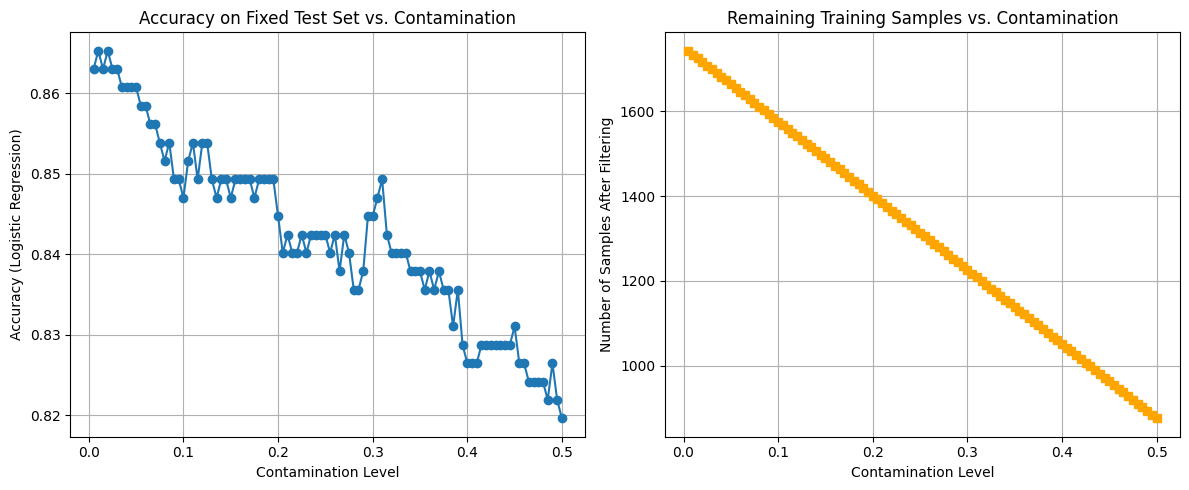

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fix the test set (20% stratified)
X = train_df[numerical_columns]
y = train_df["rainfall"]

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize test set once
scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)

# Contamination values from 0.005 to 0.5 with step 0.005
contamination_values = np.arange(0.005, 0.501, 0.005)
accuracies = []
remaining_samples = []

for contamination in contamination_values:
    # Isolation Forest on training data only
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    y_pred_outliers = iso_forest.fit_predict(X_train_full)

    # Filter inliers only
    mask_inliers = y_pred_outliers == 1
    X_train_clean = X_train_full[mask_inliers]
    y_train_clean = y_train_full[mask_inliers]
    remaining_samples.append(len(X_train_clean))

    # Standardize training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_clean)

    # Train logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train_clean)

    # Evaluate on fixed test set
    accuracy = model.score(X_test_scaled, y_test)
    accuracies.append(accuracy)

    print(f"Contamination: {contamination:.3f} | Accuracy on fixed test set: {accuracy:.3f} | Samples used: {len(X_train_clean)}")

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(contamination_values, accuracies, marker='o')
plt.title("Accuracy on Fixed Test Set vs. Contamination")
plt.xlabel("Contamination Level")
plt.ylabel("Accuracy (Logistic Regression)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(contamination_values, remaining_samples, marker='s', color='orange')
plt.title("Remaining Training Samples vs. Contamination")
plt.xlabel("Contamination Level")
plt.ylabel("Number of Samples After Filtering")
plt.grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.005 | Accuracy on fixed test set: 0.852 | Samples used: 1743


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.010 | Accuracy on fixed test set: 0.847 | Samples used: 1734


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.015 | Accuracy on fixed test set: 0.849 | Samples used: 1725


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.020 | Accuracy on fixed test set: 0.847 | Samples used: 1716


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.025 | Accuracy on fixed test set: 0.847 | Samples used: 1708


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.030 | Accuracy on fixed test set: 0.856 | Samples used: 1699


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.035 | Accuracy on fixed test set: 0.842 | Samples used: 1690


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.040 | Accuracy on fixed test set: 0.849 | Samples used: 1681


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.045 | Accuracy on fixed test set: 0.847 | Samples used: 1673


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.050 | Accuracy on fixed test set: 0.852 | Samples used: 1664


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.055 | Accuracy on fixed test set: 0.854 | Samples used: 1655


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.060 | Accuracy on fixed test set: 0.847 | Samples used: 1646


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.065 | Accuracy on fixed test set: 0.842 | Samples used: 1638


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.070 | Accuracy on fixed test set: 0.854 | Samples used: 1629


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.075 | Accuracy on fixed test set: 0.836 | Samples used: 1620


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.080 | Accuracy on fixed test set: 0.852 | Samples used: 1611


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.085 | Accuracy on fixed test set: 0.845 | Samples used: 1603


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.090 | Accuracy on fixed test set: 0.854 | Samples used: 1594


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.095 | Accuracy on fixed test set: 0.838 | Samples used: 1585


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.100 | Accuracy on fixed test set: 0.849 | Samples used: 1576


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.105 | Accuracy on fixed test set: 0.852 | Samples used: 1568


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.110 | Accuracy on fixed test set: 0.842 | Samples used: 1559


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.115 | Accuracy on fixed test set: 0.847 | Samples used: 1550


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.120 | Accuracy on fixed test set: 0.847 | Samples used: 1541


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.125 | Accuracy on fixed test set: 0.829 | Samples used: 1533


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.130 | Accuracy on fixed test set: 0.838 | Samples used: 1524


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.135 | Accuracy on fixed test set: 0.840 | Samples used: 1515


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.140 | Accuracy on fixed test set: 0.849 | Samples used: 1506


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.145 | Accuracy on fixed test set: 0.845 | Samples used: 1498


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.150 | Accuracy on fixed test set: 0.845 | Samples used: 1489


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.155 | Accuracy on fixed test set: 0.826 | Samples used: 1480


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.160 | Accuracy on fixed test set: 0.836 | Samples used: 1471


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.165 | Accuracy on fixed test set: 0.826 | Samples used: 1463


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.170 | Accuracy on fixed test set: 0.838 | Samples used: 1454


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.175 | Accuracy on fixed test set: 0.815 | Samples used: 1445


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.180 | Accuracy on fixed test set: 0.842 | Samples used: 1436


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.185 | Accuracy on fixed test set: 0.831 | Samples used: 1428


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.190 | Accuracy on fixed test set: 0.842 | Samples used: 1419


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.195 | Accuracy on fixed test set: 0.829 | Samples used: 1410


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.200 | Accuracy on fixed test set: 0.826 | Samples used: 1401


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.205 | Accuracy on fixed test set: 0.838 | Samples used: 1393


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.210 | Accuracy on fixed test set: 0.824 | Samples used: 1384


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.215 | Accuracy on fixed test set: 0.831 | Samples used: 1375


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.220 | Accuracy on fixed test set: 0.804 | Samples used: 1366


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.225 | Accuracy on fixed test set: 0.820 | Samples used: 1358


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.230 | Accuracy on fixed test set: 0.811 | Samples used: 1349


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.235 | Accuracy on fixed test set: 0.820 | Samples used: 1340


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.240 | Accuracy on fixed test set: 0.826 | Samples used: 1331


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.245 | Accuracy on fixed test set: 0.831 | Samples used: 1323


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.250 | Accuracy on fixed test set: 0.820 | Samples used: 1314


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.255 | Accuracy on fixed test set: 0.822 | Samples used: 1305


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.260 | Accuracy on fixed test set: 0.822 | Samples used: 1296


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.265 | Accuracy on fixed test set: 0.829 | Samples used: 1287


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.270 | Accuracy on fixed test set: 0.826 | Samples used: 1279


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.275 | Accuracy on fixed test set: 0.838 | Samples used: 1270


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.280 | Accuracy on fixed test set: 0.829 | Samples used: 1261


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.285 | Accuracy on fixed test set: 0.836 | Samples used: 1252


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.290 | Accuracy on fixed test set: 0.831 | Samples used: 1244


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.295 | Accuracy on fixed test set: 0.826 | Samples used: 1235


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.300 | Accuracy on fixed test set: 0.829 | Samples used: 1226


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.305 | Accuracy on fixed test set: 0.831 | Samples used: 1217


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.310 | Accuracy on fixed test set: 0.833 | Samples used: 1209


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.315 | Accuracy on fixed test set: 0.822 | Samples used: 1200


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.320 | Accuracy on fixed test set: 0.822 | Samples used: 1191


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.325 | Accuracy on fixed test set: 0.820 | Samples used: 1182


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.330 | Accuracy on fixed test set: 0.822 | Samples used: 1174


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.335 | Accuracy on fixed test set: 0.824 | Samples used: 1165


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.340 | Accuracy on fixed test set: 0.822 | Samples used: 1156


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.345 | Accuracy on fixed test set: 0.822 | Samples used: 1147


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.350 | Accuracy on fixed test set: 0.836 | Samples used: 1139


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.355 | Accuracy on fixed test set: 0.829 | Samples used: 1130


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.360 | Accuracy on fixed test set: 0.822 | Samples used: 1121


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.365 | Accuracy on fixed test set: 0.831 | Samples used: 1112


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.370 | Accuracy on fixed test set: 0.829 | Samples used: 1104


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.375 | Accuracy on fixed test set: 0.831 | Samples used: 1095


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.380 | Accuracy on fixed test set: 0.817 | Samples used: 1086


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.385 | Accuracy on fixed test set: 0.820 | Samples used: 1077


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.390 | Accuracy on fixed test set: 0.826 | Samples used: 1069


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.395 | Accuracy on fixed test set: 0.820 | Samples used: 1060


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.400 | Accuracy on fixed test set: 0.806 | Samples used: 1051


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.405 | Accuracy on fixed test set: 0.820 | Samples used: 1042


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.410 | Accuracy on fixed test set: 0.836 | Samples used: 1034


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.415 | Accuracy on fixed test set: 0.815 | Samples used: 1025


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.420 | Accuracy on fixed test set: 0.797 | Samples used: 1016


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.425 | Accuracy on fixed test set: 0.801 | Samples used: 1007


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.430 | Accuracy on fixed test set: 0.795 | Samples used: 999


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.435 | Accuracy on fixed test set: 0.817 | Samples used: 990


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.440 | Accuracy on fixed test set: 0.808 | Samples used: 981


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.445 | Accuracy on fixed test set: 0.801 | Samples used: 972


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.450 | Accuracy on fixed test set: 0.804 | Samples used: 964


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.455 | Accuracy on fixed test set: 0.815 | Samples used: 955


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.460 | Accuracy on fixed test set: 0.815 | Samples used: 946


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.465 | Accuracy on fixed test set: 0.817 | Samples used: 937


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.470 | Accuracy on fixed test set: 0.804 | Samples used: 929


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.475 | Accuracy on fixed test set: 0.808 | Samples used: 920


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.480 | Accuracy on fixed test set: 0.795 | Samples used: 911


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.485 | Accuracy on fixed test set: 0.804 | Samples used: 902


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.490 | Accuracy on fixed test set: 0.795 | Samples used: 894


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.495 | Accuracy on fixed test set: 0.815 | Samples used: 885


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Contamination: 0.500 | Accuracy on fixed test set: 0.813 | Samples used: 876


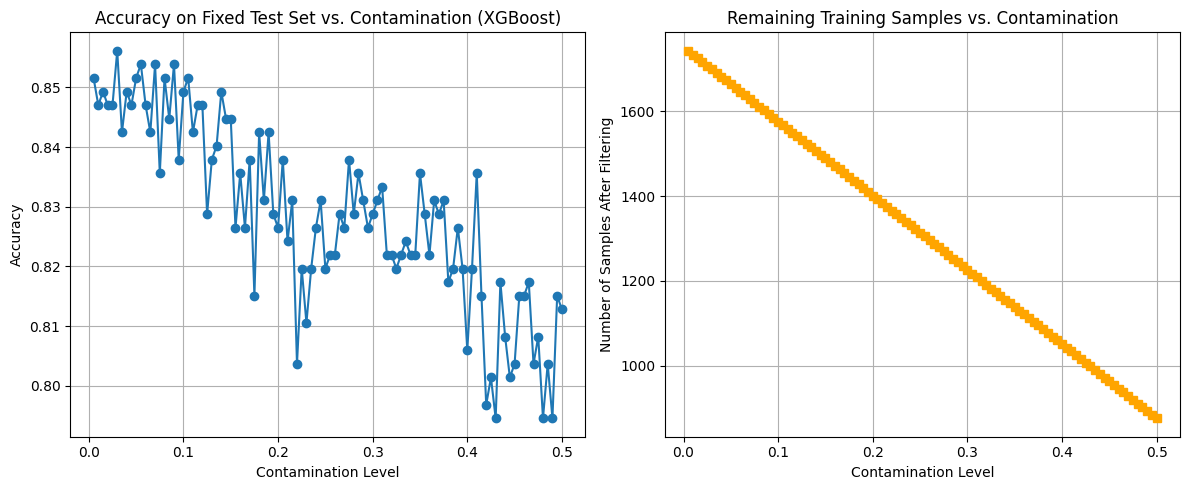

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Fix the test set (20% stratified)
X = train_df[numerical_columns]
y = train_df["rainfall"]

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize test set once
scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)

# Contamination values from 0.005 to 0.5 with step 0.005
contamination_values = np.arange(0.005, 0.501, 0.005)
accuracies = []
remaining_samples = []

for contamination in contamination_values:
    # Isolation Forest on training data only
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    y_pred_outliers = iso_forest.fit_predict(X_train_full)

    # Filter inliers only
    mask_inliers = y_pred_outliers == 1
    X_train_clean = X_train_full[mask_inliers]
    y_train_clean = y_train_full[mask_inliers]
    remaining_samples.append(len(X_train_clean))

    # Standardize training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_clean)

    # Train XGBoost classifier
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train_scaled, y_train_clean)

    # Evaluate on fixed test set
    accuracy = model.score(X_test_scaled, y_test)
    accuracies.append(accuracy)

    print(f"Contamination: {contamination:.3f} | Accuracy on fixed test set: {accuracy:.3f} | Samples used: {len(X_train_clean)}")

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(contamination_values, accuracies, marker='o')
plt.title("Accuracy on Fixed Test Set vs. Contamination (XGBoost)")
plt.xlabel("Contamination Level")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(contamination_values, remaining_samples, marker='s', color='orange')
plt.title("Remaining Training Samples vs. Contamination")
plt.xlabel("Contamination Level")
plt.ylabel("Number of Samples After Filtering")
plt.grid(True)

plt.tight_layout()
plt.show()



--- Run 1 / 10 ---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,


--- Run 2 / 10 ---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,


--- Run 3 / 10 ---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,


--- Run 4 / 10 ---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,


--- Run 5 / 10 ---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,


--- Run 6 / 10 ---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,


--- Run 7 / 10 ---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,


--- Run 8 / 10 ---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,


--- Run 9 / 10 ---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,


--- Run 10 / 10 ---


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,

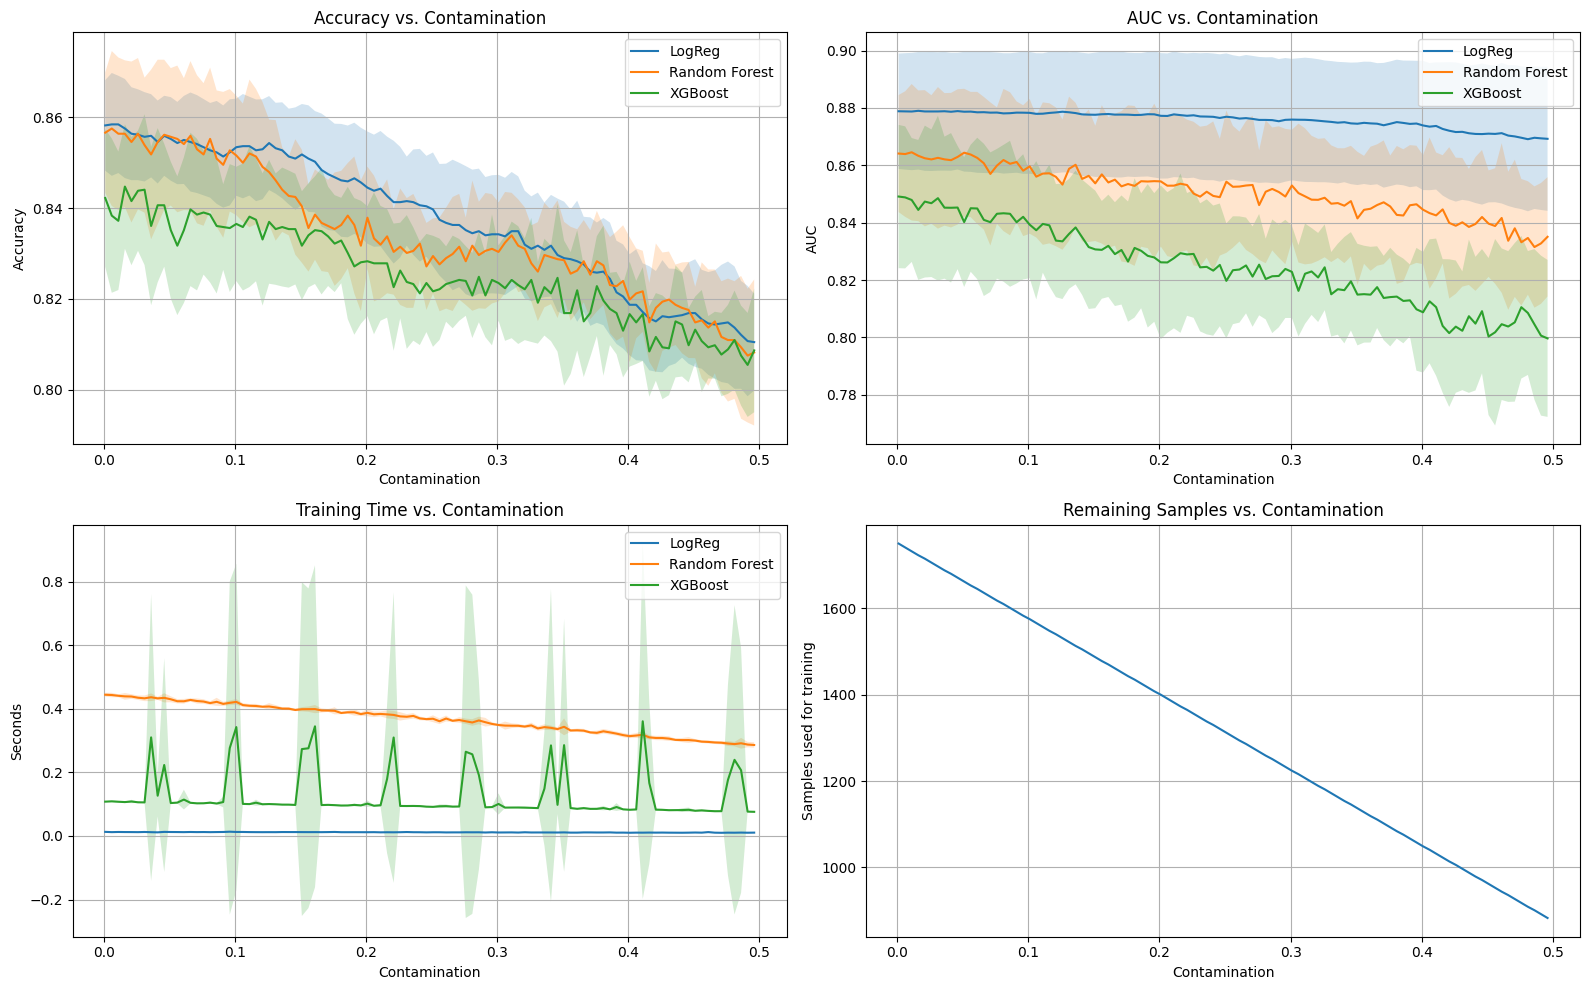

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

# Parameters
contamination_values = np.arange(0.001, 0.501, 0.005)
n_runs = 10

# Storage: {model: list of runs, each run = list of values per contamination}
results = {
    "logreg": {"accuracy": [], "auc": [], "times": []},
    "rf": {"accuracy": [], "auc": [], "times": []},
    "xgb": {"accuracy": [], "auc": [], "times": []},
    "remaining_samples": []
}

for run in range(n_runs):
    print(f"\n--- Run {run + 1} / {n_runs} ---")
    
    # Split with different random seed
    X = train_df[numerical_columns]
    y = train_df["rainfall"]
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42 + run
    )
    
    scaler_test = StandardScaler()
    X_test_scaled = scaler_test.fit_transform(X_test)

    # Per-run storage
    run_logreg_acc, run_rf_acc, run_xgb_acc = [], [], []
    run_logreg_auc, run_rf_auc, run_xgb_auc = [], [], []
    run_logreg_time, run_rf_time, run_xgb_time = [], [], []
    run_remaining = []

    for contamination in contamination_values:
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        iso_forest.fit(X_train_full)  # fit on DataFrame with column names
        y_pred_outliers = iso_forest.predict(X_train_full)  # predict on same structure

        mask_inliers = y_pred_outliers == 1
        X_train_clean = X_train_full[mask_inliers]
        y_train_clean = y_train_full[mask_inliers]
        run_remaining.append(len(X_train_clean))

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_clean)

        # Logistic Regression
        start = time.time()
        logreg = LogisticRegression(max_iter=1000)
        logreg.fit(X_train_scaled, y_train_clean)
        acc = logreg.score(X_test_scaled, y_test)
        auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
        run_logreg_acc.append(acc)
        run_logreg_auc.append(auc)
        run_logreg_time.append(time.time() - start)

        # Random Forest
        start = time.time()
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train_scaled, y_train_clean)
        acc = rf.score(X_test_scaled, y_test)
        auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
        run_rf_acc.append(acc)
        run_rf_auc.append(auc)
        run_rf_time.append(time.time() - start)

        # XGBoost
        start = time.time()
        xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
        xgb.fit(X_train_scaled, y_train_clean)
        acc = xgb.score(X_test_scaled, y_test)
        auc = roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:, 1])
        run_xgb_acc.append(acc)
        run_xgb_auc.append(auc)
        run_xgb_time.append(time.time() - start)

    # Store for this run
    results["logreg"]["accuracy"].append(run_logreg_acc)
    results["logreg"]["auc"].append(run_logreg_auc)
    results["logreg"]["times"].append(run_logreg_time)
    results["rf"]["accuracy"].append(run_rf_acc)
    results["rf"]["auc"].append(run_rf_auc)
    results["rf"]["times"].append(run_rf_time)
    results["xgb"]["accuracy"].append(run_xgb_acc)
    results["xgb"]["auc"].append(run_xgb_auc)
    results["xgb"]["times"].append(run_xgb_time)
    results["remaining_samples"].append(run_remaining)

# Convert to numpy arrays for averaging
for model in ["logreg", "rf", "xgb"]:
    for metric in ["accuracy", "auc", "times"]:
        results[model][metric] = np.array(results[model][metric])  # shape = (n_runs, n_contaminations)

results["remaining_samples"] = np.array(results["remaining_samples"])  # shape = (n_runs, n_contaminations)

# Plot mean + std deviation
def plot_with_std(y_values, label, contamination_values):
    mean = np.mean(y_values, axis=0)
    std = np.std(y_values, axis=0)
    plt.plot(contamination_values, mean, label=label)
    plt.fill_between(contamination_values, mean - std, mean + std, alpha=0.2)

plt.figure(figsize=(16, 10))

# Accuracy
plt.subplot(2, 2, 1)
plot_with_std(results["logreg"]["accuracy"], "LogReg", contamination_values)
plot_with_std(results["rf"]["accuracy"], "Random Forest", contamination_values)
plot_with_std(results["xgb"]["accuracy"], "XGBoost", contamination_values)
plt.title("Accuracy vs. Contamination")
plt.xlabel("Contamination")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

# AUC
plt.subplot(2, 2, 2)
plot_with_std(results["logreg"]["auc"], "LogReg", contamination_values)
plot_with_std(results["rf"]["auc"], "Random Forest", contamination_values)
plot_with_std(results["xgb"]["auc"], "XGBoost", contamination_values)
plt.title("AUC vs. Contamination")
plt.xlabel("Contamination")
plt.ylabel("AUC")
plt.grid(True)
plt.legend()

# Training Time
plt.subplot(2, 2, 3)
plot_with_std(results["logreg"]["times"], "LogReg", contamination_values)
plot_with_std(results["rf"]["times"], "Random Forest", contamination_values)
plot_with_std(results["xgb"]["times"], "XGBoost", contamination_values)
plt.title("Training Time vs. Contamination")
plt.xlabel("Contamination")
plt.ylabel("Seconds")
plt.grid(True)
plt.legend()

# Remaining Samples
plt.subplot(2, 2, 4)
plot_with_std(results["remaining_samples"], "Remaining Samples", contamination_values)
plt.title("Remaining Samples vs. Contamination")
plt.xlabel("Contamination")
plt.ylabel("Samples used for training")
plt.grid(True)

plt.tight_layout()
plt.show()

✅ Stage 1 — Broad Random Search
- Cover a wide space with RandomizedSearchCV (e.g., 100 iterations).
- Use AUC as scoring metric (robust to class imbalance).
- Discard clearly weak regions of the space.

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Isolation Forest (contamination fixed)
iso_forest = IsolationForest(contamination=0.0082, random_state=42)
y_pred_outliers = iso_forest.fit_predict(X_train_full)
mask_inliers = y_pred_outliers == 1
X_train_clean = X_train_full.loc[mask_inliers]
y_train_clean = y_train_full.loc[mask_inliers]

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)

# Define a very wide search space
param_dist = {
    "n_estimators": np.arange(100, 1201, 100),
    "max_depth": [None] + list(np.arange(5, 105, 10)),
    "min_samples_split": np.arange(2, 21),
    "min_samples_leaf": np.arange(1, 21),
    "max_features": ['sqrt', 'log2', None, 0.1, 0.2, 0.3, 0.5, 0.7],
    "bootstrap": [True, False],
    "class_weight": [None, 'balanced']
}

# Scoring
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Random search
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Deep search
    scoring=auc_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_scaled, y_train_clean)

print("Best AUC:", random_search.best_score_)
print("Best Params:", random_search.best_params_)

# Save best model
best_rf_stage1 = random_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best AUC: 0.8919664364190197
Best Params: {'n_estimators': 100, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 25, 'class_weight': None, 'bootstrap': True}


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


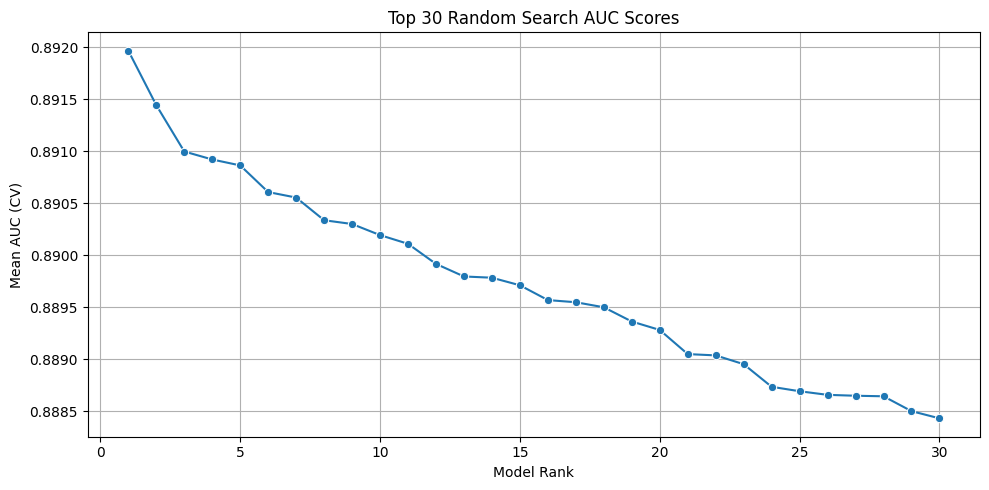

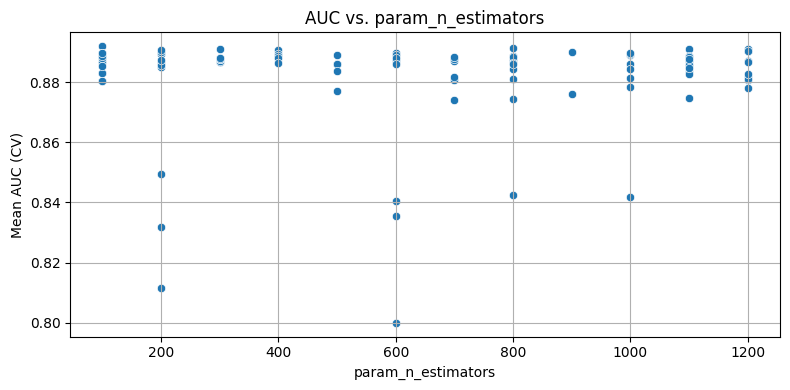

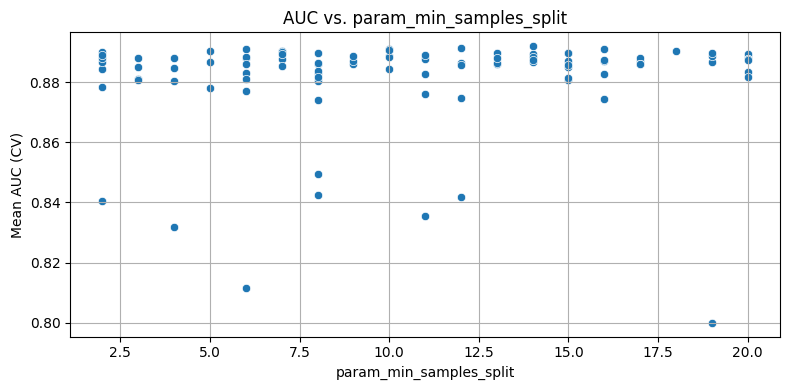

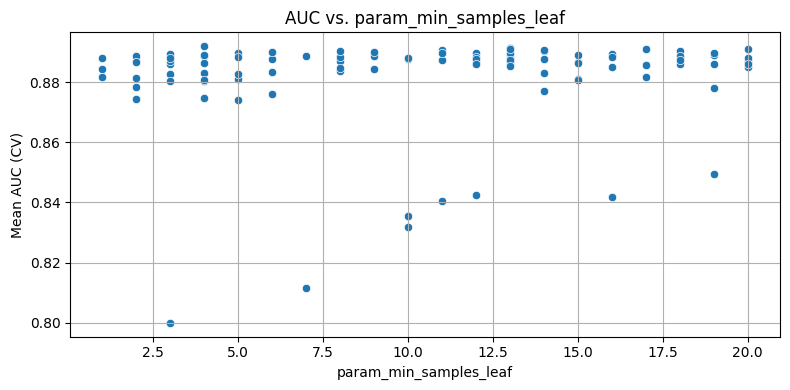

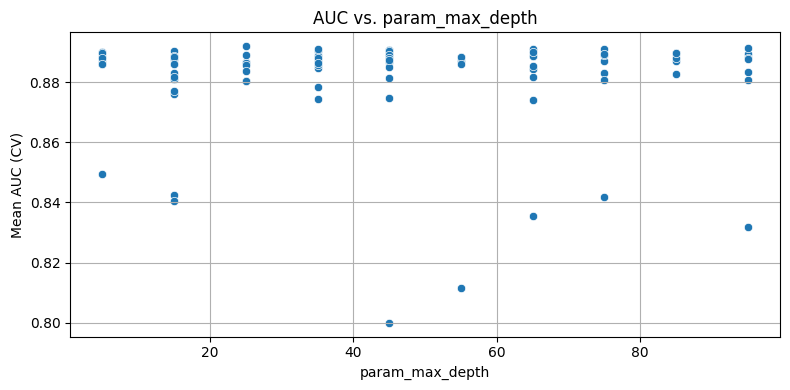

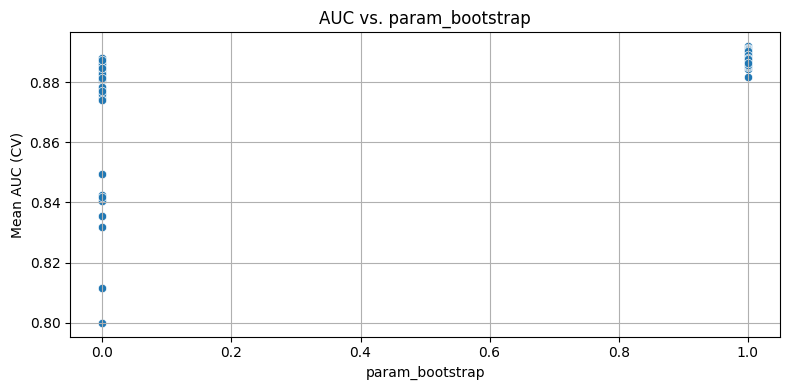

Top 20 hyperparameter combinations:


param_n_estimators param_min_samples_split param_min_samples_leaf  \
5                 100                      14                      4   
23                800                      12                     13   
47               1100                       6                     20   
4                 300                      16                     17   
70               1200                      10                     13   
27                400                      10                     11   
79                200                      10                     14   
49               1200                      18                     18   
86               1200                       5                      8   
24               1200                       7                     14   
42                200                       7                      9   
71                900                       2                      6   
65                100                      19                     19   
57                600                      15                     13   
17                200                      13                      5   
6                 100                       8                     12   
75               1000                      15                     11   
19                200                      14                     13   
46                400                       7                     16   
63               1000                      20                      3   

   param_max_features param_max_depth param_class_weight param_bootstrap  \
5                sqrt              25               None            True   
23                0.3              95           balanced            True   
47                0.3              75               None            True   
4                sqrt              65               None            True   
70                0.3              35           balanced            True   
27               sqrt              45               None            True   
79                0.3              45               None            True   
49               log2              35           balanced            True   
86                0.2              45               None            True   
24                0.5              15               None            True   
42                0.5               5               None            True   
71               sqrt              65               None            True   
65                0.5               5               None            True   
57                0.2              85               None            True   
17               sqrt              85               None            True   
6                sqrt              85           balanced            True   
75                0.2              45           balanced            True   
19                0.2              95           balanced            True   
46               log2              45           balanced            True   
63               log2              75           balanced            True   

    mean_test_score  rank_test_score  
5          0.891966                1  
23         0.891443                2  
47         0.890998                3  
4          0.890921                4  
70         0.890864                5  
27         0.890608                6  
79         0.890555                7  
49         0.890338                8  
86         0.890301                9  
24         0.890195               10  
42         0.890111               11  
71         0.889918               12  
65         0.889797               13  
57         0.889785               14  
17         0.889712               15  
6          0.889570               16  
75         0.889549               17  
19         0.889501               18  
46         0.889364               19  
63         0.889283               20

In [37]:
# ======================
# 📊 RESULTS & PLOTS
# ======================

# Create DataFrame of results
random_results = pd.DataFrame(random_search.cv_results_)

# 🎯 Top 30 AUC scores
random_results_sorted = random_results.sort_values(by="mean_test_score", ascending=False)
plt.figure(figsize=(10, 5))
sns.lineplot(data=random_results_sorted.head(30), x=range(1, 31), y="mean_test_score", marker="o")
plt.title("Top 30 Random Search AUC Scores")
plt.xlabel("Model Rank")
plt.ylabel("Mean AUC (CV)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📉 AUC vs. each numeric hyperparameter
numeric_params = []
for col in random_results.columns:
    if col.startswith("param_"):
        try:
            pd.to_numeric(random_results[col])
            numeric_params.append(col)
        except:
            continue

for param in numeric_params:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=random_results[param], y=random_results["mean_test_score"])
    plt.title(f"AUC vs. {param}")
    plt.xlabel(param)
    plt.ylabel("Mean AUC (CV)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📋 Top 20 configurations (overview table)
display_cols = [col for col in random_results.columns if col.startswith("param_")] + ["mean_test_score", "rank_test_score"]
print("Top 20 hyperparameter combinations:")
display(random_results_sorted[display_cols].head(20))

✅ 1. Deep Hyperparam Optimization for XGBoost


In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Wide XGB param space
xgb_param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10, 15],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10],
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=100,
    scoring=auc_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

xgb_search.fit(X_train_scaled, y_train_clean)

print("\n✅ XGBoost - Best AUC:", xgb_search.best_score_)
print("✅ XGBoost - Best Params:", xgb_search.best_params_)

best_xgb = xgb_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits

✅ XGBoost - Best AUC: 0.8928288835409726
✅ XGBoost - Best Params: {'subsample': 0.5, 'reg_lambda': 10, 'reg_alpha': 1, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.3}


✅ 2. Deep Hyperparam Optimization for Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

logreg_param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['saga'],
    'l1_ratio': np.linspace(0, 1, 10)  # only used when penalty='elasticnet'
}

logreg_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

logreg_search = RandomizedSearchCV(
    estimator=logreg_model,
    param_distributions=logreg_param_dist,
    n_iter=100,
    scoring=auc_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

logreg_search.fit(X_train_scaled, y_train_clean)

print("\n✅ Logistic Regression - Best AUC:", logreg_search.best_score_)
print("✅ Logistic Regression - Best Params:", logreg_search.best_params_)

best_logreg = logreg_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits

✅ Logistic Regression - Best AUC: 0.8944677846942442
✅ Logistic Regression - Best Params: {'solver': 'saga', 'penalty': 'l1', 'l1_ratio': 0.8888888888888888, 'C': 0.08858667904100823}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


✅ 3. Deep Hyperparam Optimization — CatBoost

In [40]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

catboost_model = CatBoostClassifier(verbose=0, random_state=42)

catboost_param_dist = {
    'iterations': [100, 300, 500, 700],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'border_count': [32, 64, 128],
}

catboost_search = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=catboost_param_dist,
    n_iter=60,
    scoring=auc_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

catboost_search.fit(X_train_scaled, y_train_clean)

print("\n✅ CatBoost - Best AUC:", catboost_search.best_score_)
print("✅ CatBoost - Best Params:", catboost_search.best_params_)

best_catboost = catboost_search.best_estimator_


Fitting 5 folds for each of 60 candidates, totalling 300 fits

✅ CatBoost - Best AUC: 0.892502441983822
✅ CatBoost - Best Params: {'learning_rate': 0.03, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 4, 'border_count': 32, 'bagging_temperature': 0.5}


✅ 4. Deep Hyperparam Optimization — LightGBM

In [41]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)

lgbm_param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [-1, 5, 10, 15, 20],
    'num_leaves': [15, 31, 50, 70],
    'min_child_samples': [5, 10, 20, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.01, 0.1, 1, 10]
}

lgbm_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=lgbm_param_dist,
    n_iter=60,
    scoring=auc_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

lgbm_search.fit(X_train_scaled, y_train_clean)

print("\n✅ LightGBM - Best AUC:", lgbm_search.best_score_)
print("✅ LightGBM - Best Params:", lgbm_search.best_params_)

best_lgbm = lgbm_search.best_estimator_


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Info] Number of positive: 1316, number of negative: 421
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1560
[LightGBM] [Info] Number of data points in the train set: 1737, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757628 -> initscore=1.139719
[LightGBM] [Info] Start training from score 1.139719
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


✅ Final Diverse Stacking Ensemble — 5 Tuned Models


In [42]:
voting_model = VotingClassifier(
    estimators=[
        ("logreg", best_logreg),
        ("xgb", best_xgb),
        ("cat", best_catboost),
        ("rf", best_rf_stage1),
        ("lgbm", best_lgbm)
    ],
    voting="soft",
    weights=[1.0, 0.95, 0.94, 0.93, 0.90],
    n_jobs=-1
)


📊 Weighted Soft Voting Ensemble Results:
Accuracy: 0.8790
AUC: 0.8807

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       108
           1       0.91      0.94      0.92       330

    accuracy                           0.88       438
   macro avg       0.84      0.82      0.83       438
weighted avg       0.88      0.88      0.88       438



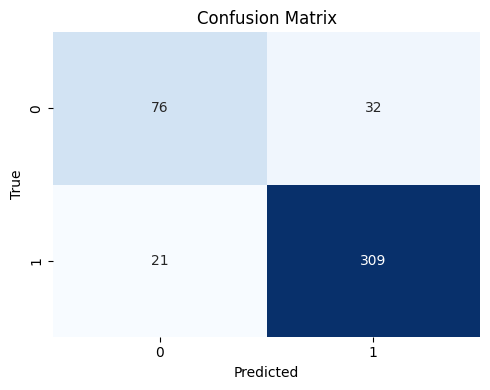

In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit model
voting_model.fit(X_train_scaled, y_train_clean)

# Predict on test set
y_pred = voting_model.predict(X_test_scaled)
y_proba = voting_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("\n📊 Weighted Soft Voting Ensemble Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()